In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
Big_Five = pd.read_csv('data-final.csv',delimiter = '\t')

In [3]:
#Data inspection and cleaning

In [4]:
Big_Five.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 110 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    EXT1                   float64
 1    EXT2                   float64
 2    EXT3                   float64
 3    EXT4                   float64
 4    EXT5                   float64
 5    EXT6                   float64
 6    EXT7                   float64
 7    EXT8                   float64
 8    EXT9                   float64
 9    EXT10                  float64
 10   EST1                   float64
 11   EST2                   float64
 12   EST3                   float64
 13   EST4                   float64
 14   EST5                   float64
 15   EST6                   float64
 16   EST7                   float64
 17   EST8                   float64
 18   EST9                   float64
 19   EST10                  float64
 20   AGR1                   float64
 21   AGR2                   float6

In [5]:
Big_Five.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [6]:
Missing = pd.DataFrame(round(100*(Big_Five.isnull().sum()/len(Big_Five.index)), 5))
Missing = Missing.sort_values(0,ascending=False)

In [7]:
Missing[Missing[0]>0]

,0
introelapse,0.20348
screenh,0.20348
screenw,0.20348
EXT1,0.17561
EST6_E,0.17561
...,...
CSN5,0.17561
CSN6,0.17561
CSN7,0.17561
CSN8,0.17561


In [8]:
Big_Five = Big_Five.dropna(how='any',axis=0)

In [9]:
Missing = pd.DataFrame(round(100*(Big_Five.isnull().sum()/len(Big_Five.index)), 5))
Missing = Missing.sort_values(0,ascending=False)

In [10]:
Big_Five = Big_Five[~(Big_Five.country=='NONE')]

In [11]:
Missing

,0
EXT1,0.0
EST10_E,0.0
CSN1_E,0.0
AGR10_E,0.0
AGR9_E,0.0
...,...
CSN4,0.0
CSN3,0.0
CSN2,0.0
CSN1,0.0


In [12]:
Big_Five = Big_Five.drop(['lat_appx_lots_of_err','long_appx_lots_of_err'],axis=1)

In [13]:
Big_Five['Year'] = Big_Five['dateload'].apply(lambda x: int(x[0:4]))
Big_Five['Month'] = Big_Five['dateload'].apply(lambda x: int(x[5:7]))
Big_Five['Date'] = Big_Five['dateload'].apply(lambda x: int(x[8:10]))
Big_Five['Hour'] = Big_Five['dateload'].apply(lambda x: int(x[11:13]))

In [14]:
Big_Five.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,screenh,introelapse,testelapse,endelapse,IPC,country,Year,Month,Date,Hour
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1024.0,9.0,234.0,6,1,GB,2016,3,3,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,768.0,12.0,179.0,11,1,MY,2016,3,3,2
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,768.0,3.0,186.0,7,1,GB,2016,3,3,2
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1200.0,186.0,219.0,7,1,GB,2016,3,3,2
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,768.0,8.0,315.0,17,2,KE,2016,3,3,2


In [15]:
Big_Five = Big_Five.drop('dateload',axis=1)

In [16]:
Big_Five['screen_a'] = Big_Five.screenw*Big_Five.screenh
Big_Five.drop(['screenw','screenh'],axis=1,inplace=True)

In [17]:
Big_Five.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN10_E,introelapse,testelapse,endelapse,IPC,Year,Month,Date,Hour,screen_a
count,998335.000000,998335.000000,998335.000000,998335.00000,998335.000000,998335.000000,998335.000000,998335.000000,998335.000000,998335.000000,...,9.983350e+05,9.983350e+05,9.983350e+05,9.983350e+05,998335.000000,998335.000000,998335.000000,998335.000000,998335.000000,9.983350e+05
mean,2.648923,2.771698,3.289338,3.13992,3.277914,2.399501,2.773122,3.415207,2.963639,3.556090,...,5.353380e+03,9.597757e+02,6.715954e+02,2.725203e+03,10.487108,2017.144503,6.386675,15.595640,11.936245,1.024100e+06
std,1.264103,1.323325,1.214451,1.23711,1.276942,1.224617,1.400095,1.271218,1.345504,1.304897,...,4.441534e+05,5.137758e+04,2.028214e+04,1.496470e+06,40.017321,0.850967,3.169771,8.841674,6.143849,6.768708e+05
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.594871e+06,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,2016.000000,1.000000,1.000000,0.000000,0.000000e+00
25%,2.000000,2.000000,2.000000,2.00000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,...,1.484000e+03,5.000000e+00,1.710000e+02,9.000000e+00,1.000000,2016.000000,4.000000,8.000000,7.000000,3.047040e+05
50%,3.000000,3.000000,3.000000,3.00000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,...,2.190000e+03,1.000000e+01,2.230000e+02,1.300000e+01,1.000000,2017.000000,6.000000,16.000000,12.000000,1.049088e+06
75%,4.000000,4.000000,4.000000,4.00000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,...,3.358000e+03,2.900000e+01,3.130000e+02,1.800000e+01,2.000000,2018.000000,9.000000,23.000000,17.000000,1.296000e+06
max,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.344289e+08,2.944307e+07,1.189272e+07,1.493327e+09,725.000000,2018.000000,12.000000,31.000000,23.000000,1.049088e+08


In [18]:
Big_Five_corr = Big_Five.corr()

In [19]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
Big_Five_corr.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse,IPC,Year,Month,Date,Hour,screen_a
EXT1,1.000000,-0.439884,0.465020,-0.487787,0.478439,-0.324069,0.582066,-0.368741,0.471239,-0.411089,-0.085291,0.138773,-0.089902,0.113699,-0.038791,-0.055037,0.000085,-0.017814,-0.048628,-0.172980,-0.012858,0.261185,0.071558,0.098607,-0.097028,0.060819,-0.204343,0.157746,0.137378,0.296829,0.037497,0.050095,0.012864,-0.016349,0.071722,0.018198,-0.031847,-0.002928,0.052248,0.046293,0.032838,0.002311,0.079386,0.020556,0.186498,-0.060199,0.074461,0.016793,-0.064592,0.167190,0.001981,-0.001388,0.000262,0.000056,-0.000154,0.001613,-0.001390,0.001373,0.000797,0.001871,0.000559,0.002370,0.000313,0.002685,0.001733,0.001802,-0.000412,0.000244,0.000300,0.001546,-0.000289,-0.000534,0.000277,0.000822,-0.000010,-0.000681,-0.000740,0.000189,0.001743,-0.001033,0.000310,-0.000020,-0.001019,0.001869,0.000414,-0.002323,-0.000446,0.001057,-0.000191,0.001639,-0.000027,-0.000304,0.002120,-0.000113,0.001217,0.000064,-0.001525,-0.000520,0.000636,0.000333,0.001795,0.002189,-0.001190,0.054687,0.003992,-0.008532,-0.000569,-0.018390,-0.006252
EXT2,-0.439884,1.000000,-0.412956,0.553466,-0.501262,0.542098,-0.444998,0.398193,-0.365115,0.491435,0.063346,0.000566,0.068457,-0.045810,0.047545,0.031699,0.023724,0.033762,0.043481,0.186105,0.123778,-0.251037,-0.033449,-0.090000,0.203413,-0.034038,0.298438,-0.129490,-0.110096,-0.202187,0.017425,-0.039491,0.050997,0.037500,-0.001445,-0.006403,0.047472,0.069382,-0.016328,0.005659,-0.026667,0.055700,-0.020752,0.041107,-0.095151,0.093133,-0.016562,-0.016775,0.080763,-0.106890,-0.000988,0.000651,-0.000028,-0.001223,-0.000328,-0.000633,-0.000197,-0.000211,-0.000472,0.000111,-0.000185,-0.000984,0.000796,-0.002070,0.001692,-0.001529,-0.001771,-0.001132,-0.000138,-0.001229,0.001143,-0.000122,-0.000381,0.000607,-0.001348,0.000963,-0.001213,0.000298,-0.000366,0.000515,-0.000367,-0.001135,0.001423,-0.001427,-0.000394,-0.001106,0.000021,-0.001662,0.002053,-0.001448,0.001879,-0.001779,-0.001995,-0.001331,0.000503,0.000343,0.000055,-0.000399,-0.000328,-0.000287,-0.002254,-0.001078,-0.001334,-0.026510,-0.022858,0.007996,0.000515,0.013696,0.007289
EXT3,0.465020,-0.412956,1.000000,-0.434551,0.554855,-0.322585,0.541179,-0.292340,0.422865,-0.434709,-0.199656,0.281848,-0.146335,0.207075,-0.133765,-0.172672,-0.150241,-0.182138,-0.195439,-0.316971,-0.095912,0.405769,-0.070430,0.218534,-0.197325,0.126483,-0.334320,0.267972,0.210955,0.373692,0.128951,-0.002731,0.081926,-0.144710,0.154207,-0.054239,0.044259,-0.110592,0.138473,0.100599,0.038225,-0.025544,0.033724,0.014500,0.175009,-0.034874,0.135189,-0.027021,-0.040922,0.138732,0.002328,0.000409,-0.001666,0.001719,-0.000582,0.000535,0.001536,0.001066,0.001612,0.000021,0.001853,0.002084,0.001297,0.002375,-0.001986,0.002543,0.000326,0.001560,-0.000852,0.002055,-0.000980,-0.001498,0.000097,-0.000278,0.001567,0.000171,0.000198,0.000562,0.000673,-0.001382,-0.001173,0.000618,-0.000609,0.000442,0.001310,-0.001735,-0.001011,0.001423,-0.000179,0.001510,0.001127,0.001093,0.001728,-0.001361,0.001281,-0.001343,-0.001782,-0.000262,-0.000154,0.001005,0.000564,0.002065,-0.001777,0.051314,0.002797,-0.011612,0.004290,-0.016604,0.018605
EXT4,-0.487787,0.553466,-0.434551,1.000000,-0.460794,0.458265,-0.466836,0.489298,-0.435764,0.539172,0.154959,-0.046666,0.187467,-0.080822,0.116877,0.125017,0.109890,0.118034,0.126635,0.266777,0.088268,-0.200901,

In [20]:
#We will create a new dataframe combining the variables based on their similar descriptions. 
#The final list of variables will Social, Not_Social, Optimal_mood, Disturbed_mood, Positive_social_interactions,
#Negative_social_interactions, Organised, Unorganised, Thinker, Non_thinker
#As well as the time spent on each of these types of questions for all sets of questions. 

In [21]:
mid = Big_Five.copy()
Big_Five_1 = mid

In [22]:
Big_Five_1['Social'] = (Big_Five_1.EXT1 + Big_Five_1.EXT3 + Big_Five_1.EXT5 + Big_Five_1.EXT7 + Big_Five_1.EXT9)/5
Big_Five_1.drop(['EXT1','EXT3','EXT5','EXT7','EXT9'],axis=1,inplace=True)
Big_Five_1['Social_E'] = (Big_Five_1.EXT1_E + Big_Five_1.EXT3_E + Big_Five_1.EXT5_E + Big_Five_1.EXT7_E + Big_Five_1.EXT9_E)/5
Big_Five_1.drop(['EXT1_E','EXT3_E','EXT5_E','EXT7_E','EXT9_E'],axis=1,inplace=True)

In [23]:
Big_Five_1['Not_Social'] = (Big_Five_1.EXT2 + Big_Five_1.EXT4 + Big_Five_1.EXT6 + Big_Five_1.EXT8 + Big_Five_1.EXT10)/5
Big_Five_1.drop(['EXT2','EXT4','EXT6','EXT8','EXT10'],axis=1,inplace=True)
Big_Five_1['Not_Social_E'] = (Big_Five_1.EXT2_E + Big_Five_1.EXT4_E + Big_Five_1.EXT6_E + Big_Five_1.EXT8_E + Big_Five_1.EXT10_E)/5
Big_Five_1.drop(['EXT2_E','EXT4_E','EXT6_E','EXT8_E','EXT10_E'],axis=1,inplace=True)

In [24]:
Big_Five_1['Optimal_mood'] = (Big_Five_1.EST2 + Big_Five_1.EST4)/2
Big_Five_1.drop(['EST2','EST4'],axis=1,inplace=True)
Big_Five_1['Optimal_mood_E'] = (Big_Five_1.EST2_E + Big_Five_1.EST4_E)/2
Big_Five_1.drop(['EST2_E','EST4_E'],axis=1,inplace=True)

In [25]:
Big_Five_1['Disturbed_mood'] = (Big_Five_1.EST1 + Big_Five_1.EST3 + Big_Five_1.EST5 + Big_Five_1.EST6 + Big_Five_1.EST7 + Big_Five_1.EST8 + Big_Five_1.EST9 + Big_Five_1.EST10)/8
Big_Five_1.drop(['EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10'],axis=1,inplace=True)
Big_Five_1['Disturbed_mood_E'] = (Big_Five_1.EST1_E + Big_Five_1.EST3_E + Big_Five_1.EST5_E + Big_Five_1.EST6_E + Big_Five_1.EST7_E + Big_Five_1.EST8_E + Big_Five_1.EST9_E + Big_Five_1.EST10_E)/8
Big_Five_1.drop(['EST1_E','EST3_E','EST5_E','EST6_E','EST7_E','EST8_E','EST9_E','EST10_E'],axis=1,inplace=True)

In [26]:
Big_Five_1['Positive_social_interactions'] = (Big_Five_1.AGR2 + Big_Five_1.AGR4 + Big_Five_1.AGR6 + Big_Five_1.AGR8 + Big_Five_1.AGR9 + Big_Five_1.AGR10)/6
Big_Five_1.drop(['AGR2','AGR4','AGR6','AGR8','AGR9','AGR10'],axis=1,inplace=True)
Big_Five_1['Positive_social_interactions_E'] = (Big_Five_1.AGR2_E + Big_Five_1.AGR4_E + Big_Five_1.AGR6_E + Big_Five_1.AGR8_E + Big_Five_1.AGR9_E + Big_Five_1.AGR10_E)/6
Big_Five_1.drop(['AGR2_E','AGR4_E','AGR6_E','AGR8_E','AGR9_E','AGR10_E'],axis=1,inplace=True)

In [27]:
Big_Five_1['Negative_social_interactions'] = (Big_Five_1.AGR1 + Big_Five_1.AGR3 + Big_Five_1.AGR5 + Big_Five_1.AGR7)/4
Big_Five_1.drop(['AGR1','AGR3','AGR5','AGR7'],axis=1,inplace=True)
Big_Five_1['Negative_social_interactions_E'] = (Big_Five_1.AGR1_E + Big_Five_1.AGR3_E + Big_Five_1.AGR5_E + Big_Five_1.AGR7_E)/4
Big_Five_1.drop(['AGR1_E','AGR3_E','AGR5_E','AGR7_E'],axis=1,inplace=True)

In [28]:
Big_Five_1['Organised'] = (Big_Five_1.CSN1 + Big_Five_1.CSN3 + Big_Five_1.CSN5 + Big_Five_1.CSN7 + Big_Five_1.CSN9 + Big_Five_1.CSN10)/6
Big_Five_1.drop(['CSN1','CSN3','CSN5','CSN7','CSN9','CSN10'],axis=1,inplace=True)
Big_Five_1['Organised_E'] = (Big_Five_1.CSN1_E + Big_Five_1.CSN3_E + Big_Five_1.CSN5_E + Big_Five_1.CSN7_E + Big_Five_1.CSN9_E + Big_Five_1.CSN10_E)/6
Big_Five_1.drop(['CSN1_E','CSN3_E','CSN5_E','CSN7_E','CSN9_E','CSN10_E'],axis=1,inplace=True)

In [29]:
Big_Five_1['Unorganised'] = (Big_Five_1.CSN2 + Big_Five_1.CSN4 + Big_Five_1.CSN6 + Big_Five_1.CSN8)/4
Big_Five_1.drop(['CSN2','CSN4','CSN6','CSN8'],axis=1,inplace=True)
Big_Five_1['Unorganised_E'] = (Big_Five_1.CSN2_E + Big_Five_1.CSN4_E + Big_Five_1.CSN6_E + Big_Five_1.CSN8_E)/4
Big_Five_1.drop(['CSN2_E','CSN4_E','CSN6_E','CSN8_E'],axis=1,inplace=True)

In [30]:
Big_Five_1['Thinker'] = (Big_Five_1.OPN1 + Big_Five_1.OPN3 + Big_Five_1.OPN5 + Big_Five_1.OPN7 + Big_Five_1.OPN8 + Big_Five_1.OPN9 + Big_Five_1.OPN10)/7
Big_Five_1.drop(['OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10'],axis=1,inplace=True)
Big_Five_1['Thinker_E'] = (Big_Five_1.OPN1_E + Big_Five_1.OPN3_E + Big_Five_1.OPN5_E + Big_Five_1.OPN7_E + Big_Five_1.OPN8_E + Big_Five_1.OPN9_E + Big_Five_1.OPN10_E)/7
Big_Five_1.drop(['OPN1_E','OPN3_E','OPN5_E','OPN7_E','OPN8_E','OPN9_E','OPN10_E'],axis=1,inplace=True)

In [31]:
Big_Five_1['Non_thinker'] = (Big_Five_1.OPN2 + Big_Five_1.OPN4 + Big_Five_1.OPN6)/3
Big_Five_1.drop(['OPN2','OPN4','OPN6'],axis=1,inplace=True)
Big_Five_1['Non_thinker_E'] = (Big_Five_1.OPN2_E + Big_Five_1.OPN4_E + Big_Five_1.OPN6_E)/3
Big_Five_1.drop(['OPN2_E','OPN4_E','OPN6_E'],axis=1,inplace=True)

In [32]:
#EDA

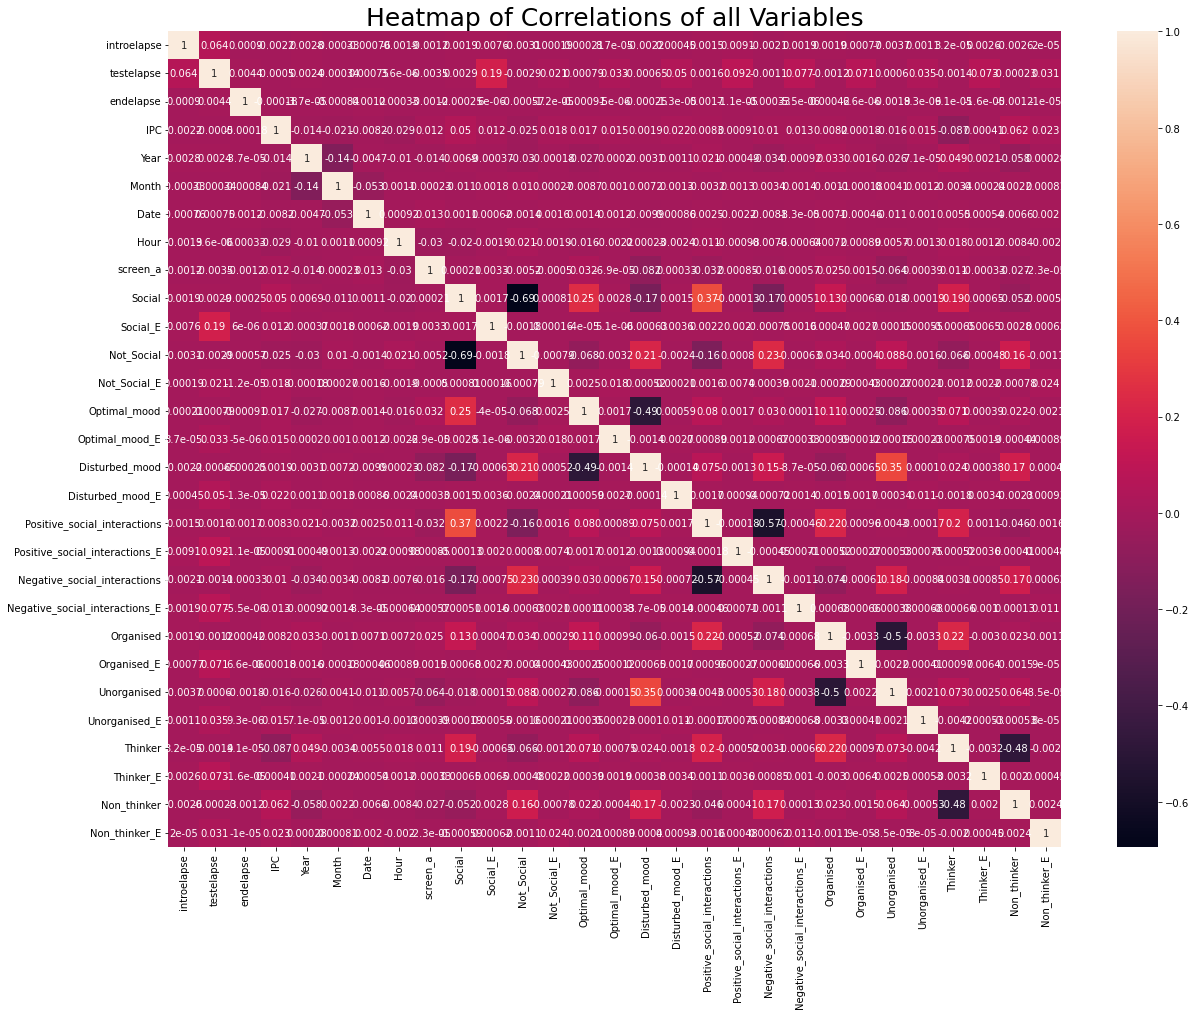

In [33]:
plt.figure(figsize=(20,15))
sns.heatmap(Big_Five_1.corr(),annot=True)
plt.title('Heatmap of Correlations of all Variables',fontsize=25)
plt.show()

In [34]:
#Grouping the data based on country.

In [35]:
def ag(x):
    lis = list(x.columns)
    lis.remove('Count')
    lis.remove('country')
    dic = dict()
    for i in lis:
        dic[i] = 'mean'
    dic['Count'] = 'sum'
    return dic
    
Big_Five_1['Count'] = 1
Big_Five_1_country = Big_Five_1.groupby(['country']).agg(ag(Big_Five_1))
Big_Five_1_country.head()

,introelapse,testelapse,endelapse,IPC,Year,Month,Date,Hour,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AD,11016.647059,348.352941,17.647059,1.117647,2017.058824,7.764706,12.941176,10.823529,9.247631e+05,3.000000,7830.870588,3.058824,5385.788235,3.176471,7227.911765,2.845588,5075.088235,3.813725,5965.568627,2.147059,6170.264706,3.401961,7080.127451,2.735294,16129.147059,3.798319,5464.882353,1.960784,6486.254902,17
AE,1516.750982,2332.854712,2798.132526,6.505563,2017.077880,6.147579,15.453534,9.302029,9.805313e+05,3.101047,181617.494175,3.040445,6485.086257,2.953207,9351.734784,3.145492,5713.195231,3.835079,6532.509435,2.344404,8694.086878,3.429756,7205.406195,2.664594,9039.358802,3.653141,7287.601861,2.124455,9286.465205,3056
AF,116.129630,27574.018519,25.740741,1.148148,2016.740741,6.018519,14.518519,11.722222,9.186405e+05,3.255556,11184.837037,3.051852,5365.548148,3.222222,6593.953704,2.837963,5682.472222,3.657407,5404.240741,2.430556,6793.569444,3.469136,5556.314815,2.643519,8920.828704,3.690476,4852.412698,2.444444,9020.191358,54
AG,236.791667,357.958333,94.458333,1.083333,2017.166667,6.166667,15.958333,12.458333,7.666843e+05,2.666667,6737.875000,3.200000,5363.391667,2.812500,4712.708333,3.015625,6002.119792,3.541667,5612.965278,2.427083,4962.427083,3.340278,4499.631944,2.604167,4951.947917,3.922619,5662.041667,1.847222,5516.638889,24
AI,12.000000,227.500000,17.500000,1.000000,2017.250000,5.750000,21.000000,7.500000,1.048832e+06,2.950000,15660.500000,3.400000,3146.300000,3.125000,3088.625000,3.062500,3175.937500,4.166667,3281.041667,1.625000,4259.687500,3.583333,3040.000000,2.312500,3081.937500,4.214286,3017.535714,1.666667,3607.000000,4


In [36]:
Big_Five_1_country = Big_Five_1_country[Big_Five_1_country.Count>1000]
Big_Five_1_country = Big_Five_1_country.sort_values('Count',ascending=False)
Big_Five_1_country.head()

,introelapse,testelapse,endelapse,IPC,Year,Month,Date,Hour,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1009.948421,654.950450,1345.280686,12.266638,2017.185972,6.265244,15.833704,12.878177,1.035964e+06,3.014909,23178.465346,3.046163,7130.256921,2.907831,9578.850192,3.015210,7126.835396,3.811505,7699.294590,2.169281,10019.250952,3.454060,8246.629149,2.669048,9777.968365,3.828388,6757.060369,1.981879,10630.453252,545414
GB,652.752550,684.826209,23581.575475,3.622060,2017.171711,6.422129,15.616395,9.361759,1.016279e+06,2.977138,29614.752255,3.025833,5295.848529,2.834036,7666.548265,3.159856,6332.191241,3.688003,5523.966405,2.273575,8026.596063,3.267189,5710.935463,2.786483,8828.019375,3.849431,4932.624669,1.974960,6778.738749,66373
CA,784.273680,640.689106,896.802659,5.917232,2017.214199,6.337938,15.599926,13.266425,1.069384e+06,2.992463,26763.135046,3.070587,6813.044984,2.888083,7763.225122,3.045965,7574.677442,3.779798,6454.688086,2.231826,10348.253802,3.409154,6798.462430,2.705843,8954.899941,3.843887,7139.733982,1.976238,8911.229119,61751
AU,1011.604234,627.710999,1377.904668,14.967477,2016.993669,6.702450,14.663273,12.440165,1.096818e+06,3.031076,27085.845900,3.029580,6477.362266,2.940095,9867.834862,3.027026,7423.815448,3.782649,7215.882337,2.219498,8038.119135,3.367151,15020.460819,2.669120,9974.077417,3.782904,6551.247047,2.047202,11752.151111,49595
PH,572.346338,530.413579,1057.404254,15.593982,2017.015979,6.497908,15.278492,10.966581,9.166327e+05,2.901931,17758.696850,3.223066,6816.909401,2.975402,9024.494329,3.216984,5349.091808,3.738201,5919.975184,2.563158,7275.685103,3.496640,5491.514559,2.745426,8175.400890,3.512015,4910.640981,2.271317,6588.154729,19839


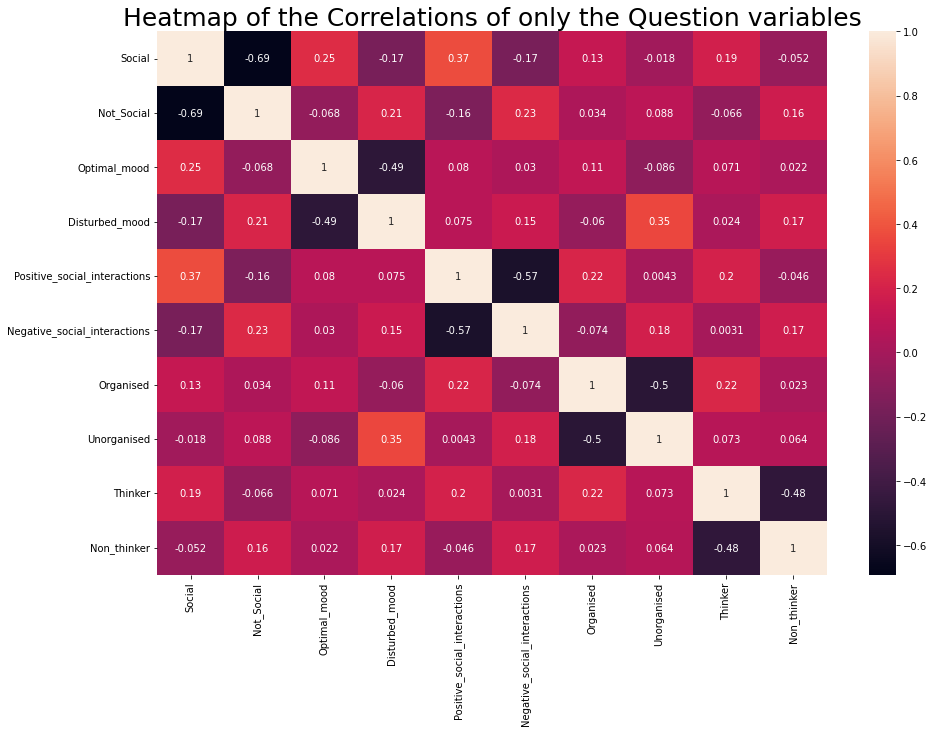

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(Big_Five_1[['Social','Not_Social','Optimal_mood','Disturbed_mood','Positive_social_interactions','Negative_social_interactions','Organised','Unorganised','Thinker','Non_thinker']].corr(),annot=True)
plt.title('Heatmap of the Correlations of only the Question variables',fontsize=25)
plt.show()

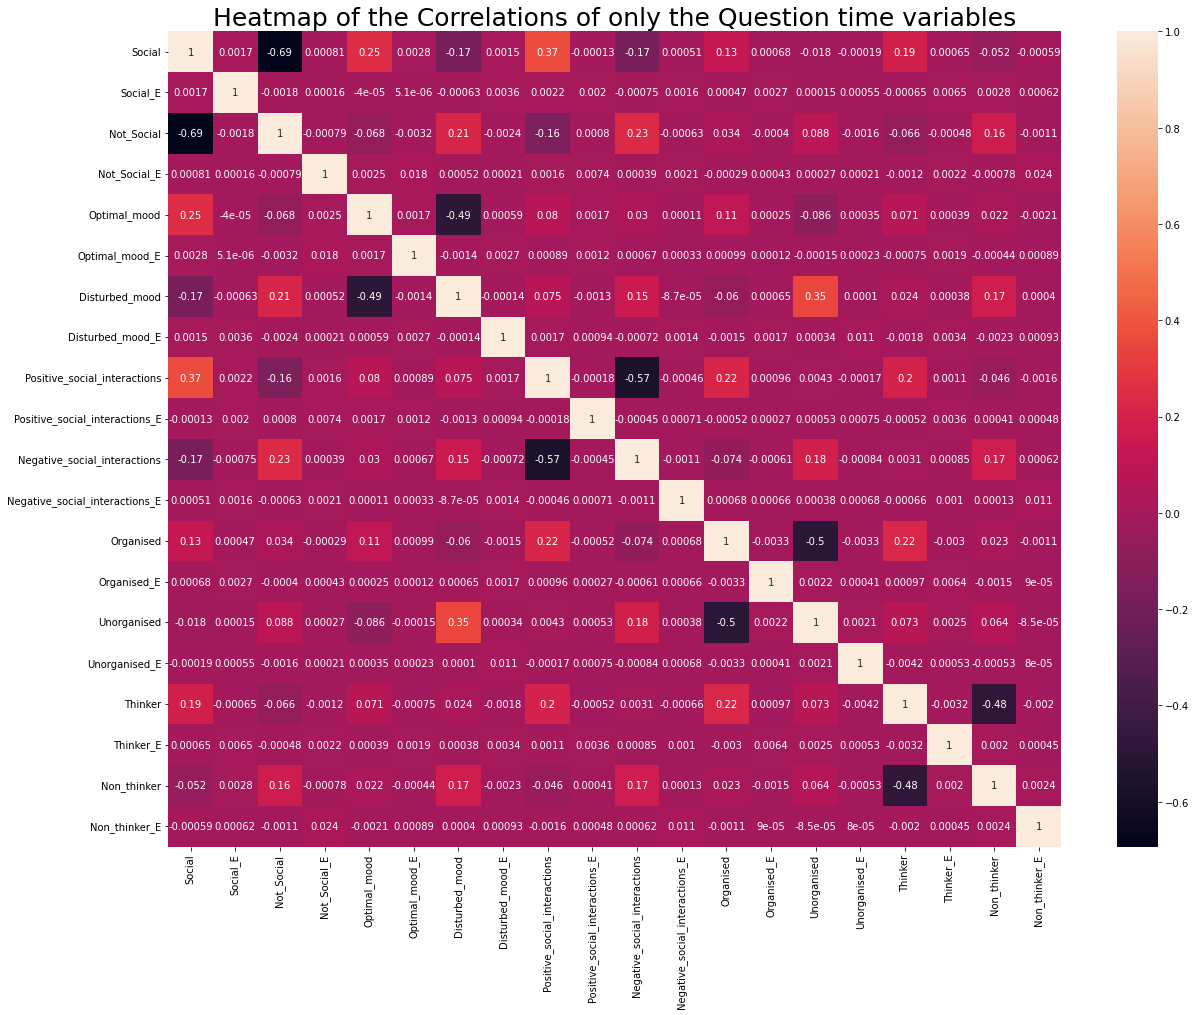

In [38]:
plt.figure(figsize=(20,15,))
sns.heatmap(Big_Five_1[['Social','Social_E','Not_Social','Not_Social_E','Optimal_mood','Optimal_mood_E','Disturbed_mood','Disturbed_mood_E','Positive_social_interactions','Positive_social_interactions_E','Negative_social_interactions','Negative_social_interactions_E','Organised','Organised_E','Unorganised','Unorganised_E','Thinker','Thinker_E','Non_thinker','Non_thinker_E']].corr(),annot=True)
plt.title('Heatmap of the Correlations of only the Question time variables',fontsize=25)
plt.show()

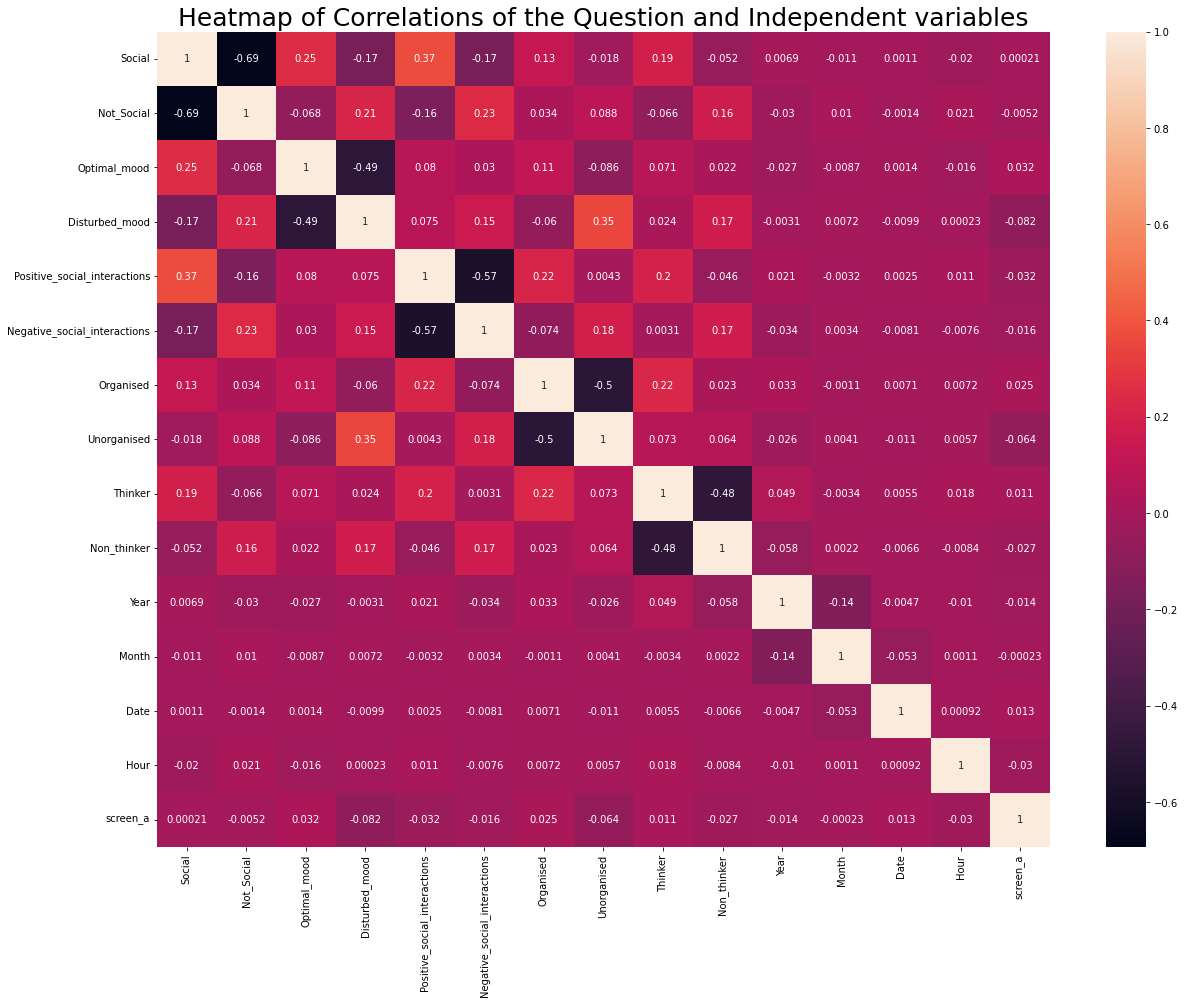

In [39]:
plt.figure(figsize=(20,15))
sns.heatmap(Big_Five_1[['Social','Not_Social','Optimal_mood','Disturbed_mood','Positive_social_interactions','Negative_social_interactions','Organised','Unorganised','Thinker','Non_thinker','Year','Month','Date','Hour','screen_a']].corr(),annot=True)
plt.title('Heatmap of Correlations of the Question and Independent variables',fontsize=25)
plt.show()

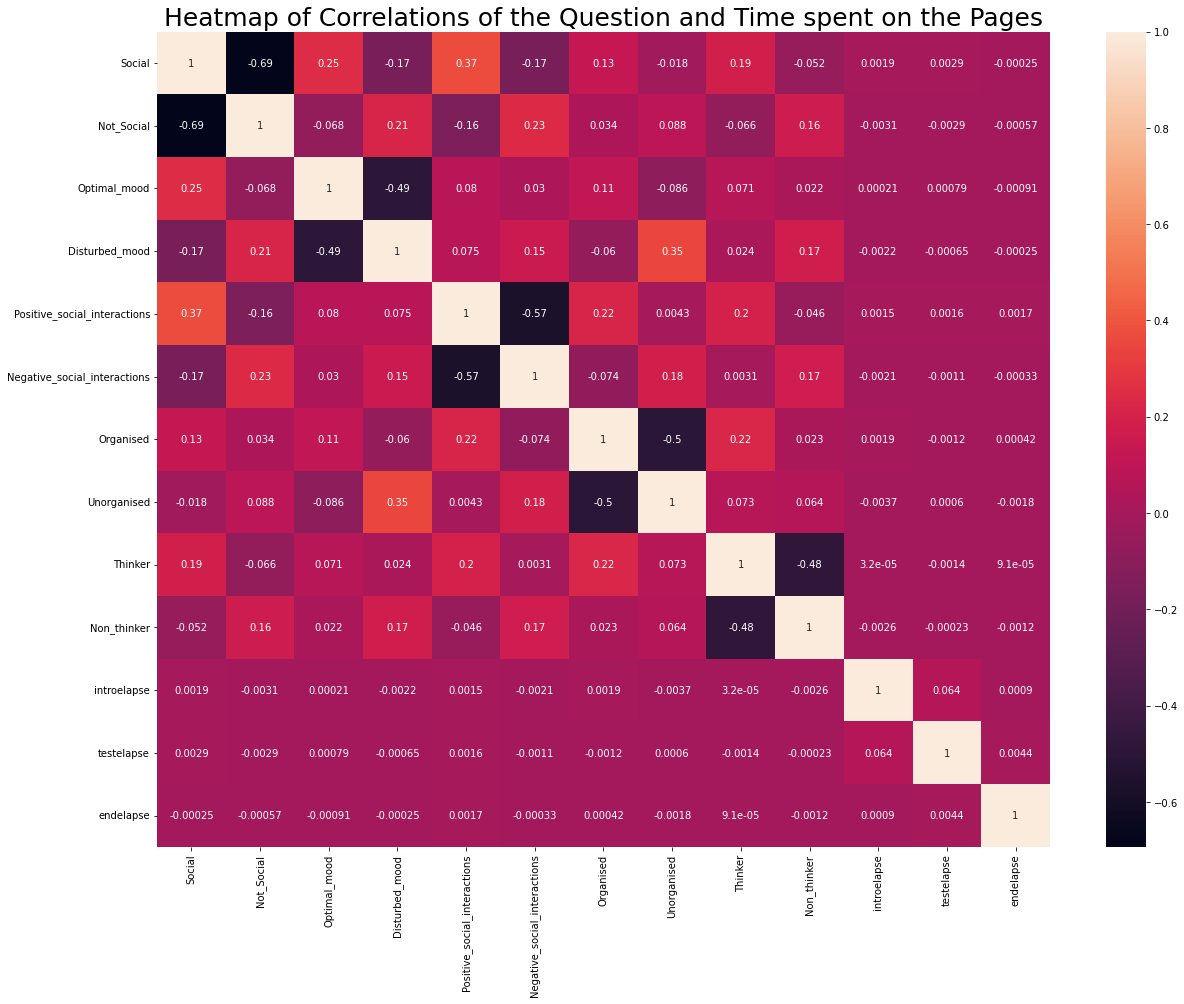

In [40]:
plt.figure(figsize=(20,15))
sns.heatmap(Big_Five_1[['Social','Not_Social','Optimal_mood','Disturbed_mood','Positive_social_interactions','Negative_social_interactions','Organised','Unorganised','Thinker','Non_thinker','introelapse','testelapse','endelapse']].corr(),annot=True)
plt.title('Heatmap of Correlations of the Question and Time spent on the Pages',fontsize=25)
plt.show()

In [41]:
Big_Five_1_Year = Big_Five_1.groupby(['Year']).mean()
Big_Five_1_Year

,introelapse,testelapse,endelapse,IPC,Month,Date,Hour,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016,747.411585,604.058293,967.469414,9.241686,7.085221,15.598197,12.031332,1.033423e+06,2.978670,25298.116174,3.100685,6678.408293,2.949054,9028.509016,3.051577,6471.196016,3.741184,7758.601724,2.282016,11079.161529,3.356104,7305.866450,2.753730,9833.126414,3.779129,5938.960960,2.043452,8527.660778,1.0
2017,985.521000,671.422179,7052.008474,15.232665,6.202478,15.727685,11.922990,1.034889e+06,2.995377,30075.834564,3.049214,9784.395998,2.920128,15063.213338,3.059502,8660.074393,3.758014,6839.599867,2.254139,12969.661248,3.412486,9300.602739,2.694542,12251.340235,3.780476,6915.591252,2.025791,17677.100864,1.0
2018,1088.383840,717.289095,1431.368332,8.607347,6.020681,15.518214,11.879650,1.011620e+06,2.995887,24776.147302,3.030810,6793.593208,2.886906,10180.583952,3.045848,7812.184577,3.779630,7339.432170,2.213113,9778.759361,3.419047,9356.560922,2.692484,10166.325920,3.854975,6945.451354,1.933232,10120.645620,1.0


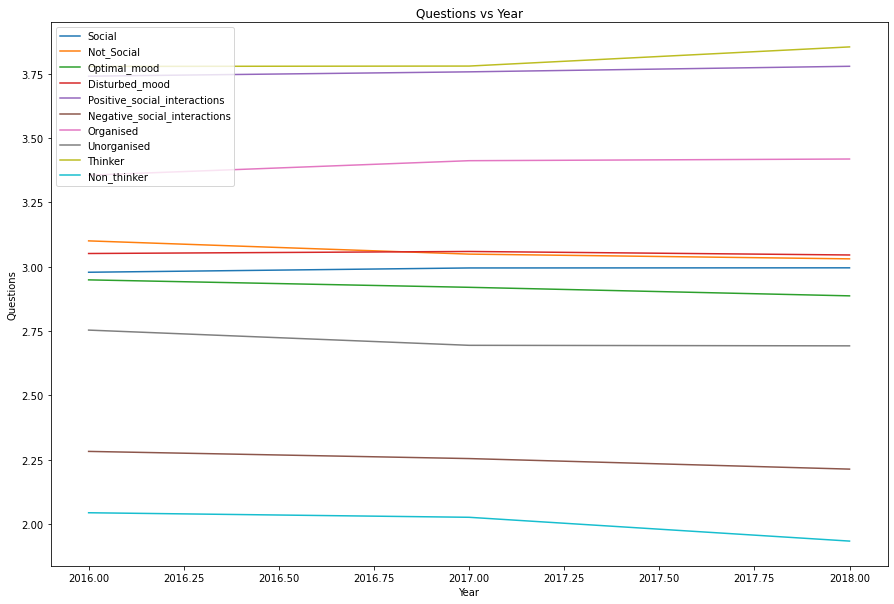

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Social, label='Social')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Not_Social, label='Not_Social')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Optimal_mood, label='Optimal_mood')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Disturbed_mood, label='Disturbed_mood')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Positive_social_interactions, label='Positive_social_interactions')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Negative_social_interactions, label='Negative_social_interactions')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Organised, label='Organised')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Unorganised, label='Unorganised')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Thinker, label='Thinker')
ax.plot(Big_Five_1_Year.index, Big_Five_1_Year.Non_thinker, label='Non_thinker')
plt.title('Questions vs Year')
plt.xlabel('Year')
plt.ylabel('Questions')
ax.legend(loc = 'upper left')
plt.show()

In [43]:
Big_Five_1_Month = Big_Five_1.groupby(['Month']).mean()
Big_Five_1_Month.head()

,introelapse,testelapse,endelapse,IPC,Year,Date,Hour,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1005.272806,644.725792,1178.328152,11.990135,2017.524596,17.488658,11.905215,1.034687e+06,3.022343,28213.048279,3.031276,8800.214364,2.925796,13337.906104,3.041402,6749.333775,3.783280,6878.324156,2.215999,12051.090019,3.421343,8299.610741,2.689453,8815.719606,3.796077,5563.090125,2.006659,8810.292290,1.0
2,806.904578,655.911231,1368.400439,10.507749,2017.597026,15.192843,11.707633,1.015800e+06,3.033163,28705.765346,3.017002,7404.368221,2.926520,8991.528886,3.036637,8963.335010,3.787211,7459.090211,2.213167,8923.971136,3.433526,7634.330430,2.674522,10644.032720,3.804361,7898.327756,2.004052,9387.003157,1.0
3,856.386890,788.150748,1561.168927,17.401145,2017.105097,15.817793,11.954721,1.018504e+06,3.022384,22244.512150,3.031771,7188.907437,2.920183,9260.180435,3.072496,6624.399291,3.769783,6958.004149,2.246496,8990.774715,3.389207,9370.298661,2.727044,9445.140026,3.790696,6068.234564,2.015436,9028.100779,1.0
4,1166.075821,700.419474,15428.676407,10.569912,2017.043169,14.962897,12.011263,1.025084e+06,3.001958,23584.188838,3.053274,7417.131504,2.912845,10467.878397,3.067128,6480.444185,3.767939,7031.032340,2.251715,10986.370628,3.382550,8022.552080,2.735680,9721.981754,3.801414,7352.859767,1.999541,13657.923147,1.0
5,968.469082,642.202233,1146.604287,7.339548,2017.006582,16.499000,11.868526,1.046593e+06,2.983656,20208.545248,3.058023,7129.297471,2.938089,7756.093524,3.010344,6632.974605,3.744685,6651.449627,2.249327,10572.391437,3.390703,6443.986842,2.696294,10095.389839,3.838375,6936.981328,1.972206,11947.495482,1.0


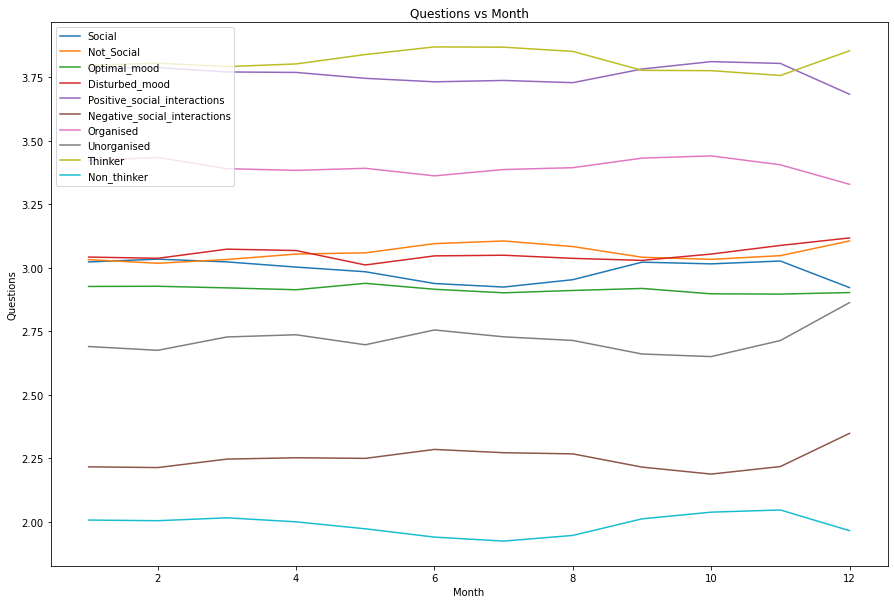

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Social, label='Social')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Not_Social, label='Not_Social')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Optimal_mood, label='Optimal_mood')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Disturbed_mood, label='Disturbed_mood')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Positive_social_interactions, label='Positive_social_interactions')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Negative_social_interactions, label='Negative_social_interactions')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Organised, label='Organised')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Unorganised, label='Unorganised')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Thinker, label='Thinker')
ax.plot(Big_Five_1_Month.index, Big_Five_1_Month.Non_thinker, label='Non_thinker')
ax.legend(loc = 'upper left')
plt.title('Questions vs Month')
plt.xlabel('Month')
plt.ylabel('Questions')
plt.show()

In [45]:
Big_Five_1_Date = Big_Five_1.groupby(['Date']).mean()
Big_Five_1_Date.head()

,introelapse,testelapse,endelapse,IPC,Year,Month,Hour,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1098.181479,645.115065,1541.302529,9.498874,2017.257031,6.777656,12.047300,1.010573e+06,2.983989,23813.946663,3.060203,8894.690636,2.906091,6900.266459,3.067174,8443.835338,3.758205,8274.016850,2.253660,9074.506162,3.391665,6563.216059,2.724218,11821.345606,3.815892,7679.665340,1.989156,9293.345850,1.0
2,1215.315491,859.145758,1090.525902,9.196496,2017.242189,6.677458,11.972798,1.020362e+06,2.967407,28585.001855,3.069065,6968.445135,2.909978,8896.678461,3.054671,7880.082849,3.748963,16247.590366,2.247226,11833.391888,3.391598,8140.979034,2.720016,8743.276544,3.818229,6612.690620,1.982607,12161.578269,1.0
3,1224.373762,616.419925,848.894337,10.834428,2017.072279,6.831907,11.850665,1.010326e+06,2.984601,22601.717850,3.056703,5951.701108,2.910502,9867.594071,3.048307,6638.232114,3.759262,7260.588541,2.244446,15017.238760,3.383414,7691.467324,2.722749,9047.720697,3.828469,5496.105667,1.972136,13034.274850,1.0
4,620.642783,616.330211,2646.042997,9.408599,2017.131679,6.534120,12.186647,9.923911e+05,2.978892,23988.585259,3.059970,5907.350069,2.905636,10730.514833,3.074080,6773.275753,3.757132,5994.202507,2.261111,12376.744896,3.395125,18795.161125,2.743443,8896.440970,3.818223,5998.473609,1.992588,8403.029330,1.0
5,544.877360,570.564210,2070.096524,10.573014,2017.191698,6.781754,11.806249,1.011592e+06,2.994301,21955.683528,3.060815,5951.726184,2.917790,9713.945108,3.059109,7187.124514,3.763011,6995.508737,2.252539,9851.026352,3.400892,9290.067946,2.716470,10364.695722,3.808977,6742.186586,2.001990,7466.613462,1.0


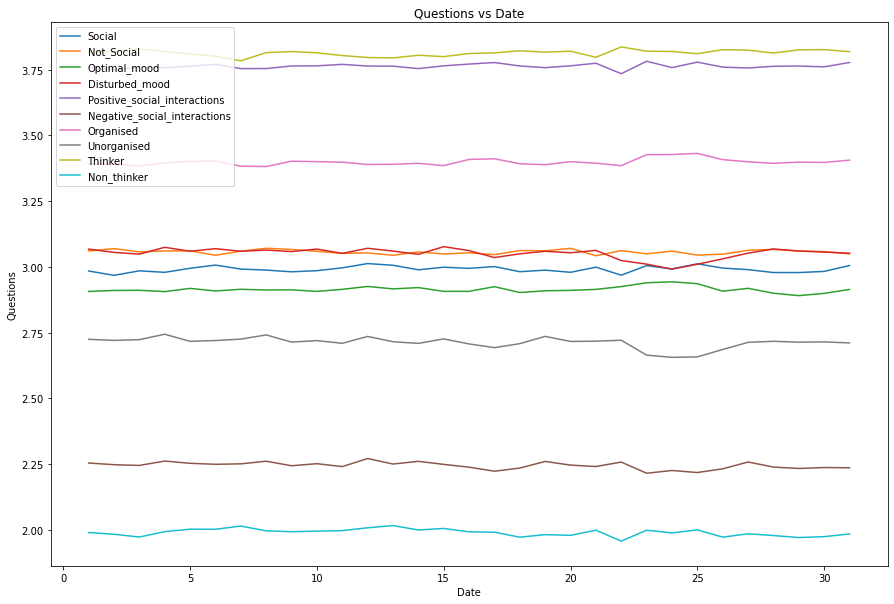

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Social, label='Social')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Not_Social, label='Not_Social')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Optimal_mood, label='Optimal_mood')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Disturbed_mood, label='Disturbed_mood')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Positive_social_interactions, label='Positive_social_interactions')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Negative_social_interactions, label='Negative_social_interactions')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Organised, label='Organised')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Unorganised, label='Unorganised')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Thinker, label='Thinker')
ax.plot(Big_Five_1_Date.index, Big_Five_1_Date.Non_thinker, label='Non_thinker')
ax.legend(loc = 'upper left')
plt.title('Questions vs Date')
plt.xlabel('Date')
plt.ylabel('Questions')
plt.show()

In [47]:
Big_Five_1_Hour = Big_Five_1.groupby(['Hour']).mean()
Big_Five_1_Hour.head()

,introelapse,testelapse,endelapse,IPC,Year,Month,Date,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
Hour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1024.984040,674.680884,1779.041735,10.232534,2017.088497,6.567290,15.527511,9.510828e+05,2.944811,54264.035886,3.091442,24941.648693,2.909468,68435.054503,3.066358,27335.543600,3.718376,10374.165975,2.331564,30744.447492,3.327767,7749.481626,2.767406,30136.346407,3.793366,6425.386460,1.993270,65780.919190,1.0
1,1152.498252,605.432479,754.015153,7.361627,2017.099326,6.594497,15.695945,9.863373e+05,2.966248,25778.452027,3.068179,6840.265224,2.911956,11225.629319,3.078319,7101.636620,3.714893,5769.877002,2.321466,7227.013800,3.320817,6640.194946,2.766693,8818.105830,3.790733,7145.046820,1.998460,11916.477979,1.0
2,1977.650253,794.218719,641.837814,5.796106,2017.115266,6.590828,15.410435,1.018093e+06,2.977566,24623.928177,3.062113,9172.658618,2.923672,11252.568609,3.069475,5781.113631,3.727694,7866.597989,2.308447,8722.999980,3.343943,8822.738521,2.735042,8781.613361,3.797572,10632.899287,1.987211,12346.634680,1.0
3,928.919097,537.045726,1099.659821,5.248566,2017.105130,6.603666,15.479564,1.016861e+06,2.978188,24381.201725,3.050050,6829.573118,2.915948,8810.911014,3.073633,7824.805318,3.731753,6617.382469,2.296579,8086.308852,3.348261,7825.072380,2.735821,8910.870362,3.802770,6403.240149,1.981175,7914.467397,1.0
4,999.350323,599.009277,1810.464669,8.594441,2017.110329,6.449598,15.614310,1.019341e+06,2.986259,22996.503057,3.040414,6845.406625,2.943787,7528.487791,3.057239,5198.054556,3.728620,5796.105851,2.285749,13540.293728,3.363741,6667.858700,2.722738,8227.592655,3.805035,5293.434192,1.986955,7681.888747,1.0


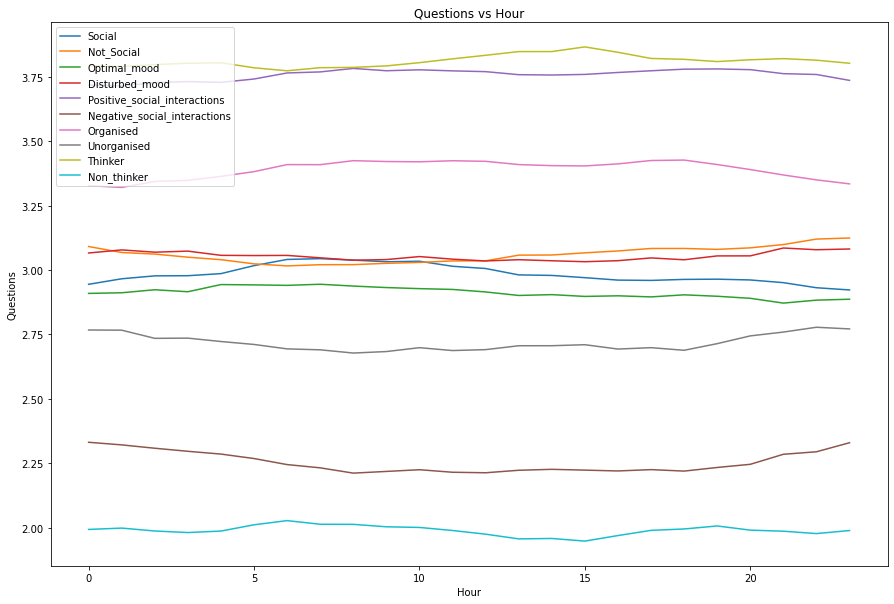

In [48]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Social, label='Social')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Not_Social, label='Not_Social')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Optimal_mood, label='Optimal_mood')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Disturbed_mood, label='Disturbed_mood')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Positive_social_interactions, label='Positive_social_interactions')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Negative_social_interactions, label='Negative_social_interactions')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Organised, label='Organised')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Unorganised, label='Unorganised')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Thinker, label='Thinker')
ax.plot(Big_Five_1_Hour.index, Big_Five_1_Hour.Non_thinker, label='Non_thinker')
ax.legend(loc = 'upper left')
plt.title('Questions vs Hour')
plt.xlabel('Hour')
plt.ylabel('Questions')
plt.show()

In [49]:
Big_Five_1_country.head()

,introelapse,testelapse,endelapse,IPC,Year,Month,Date,Hour,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1009.948421,654.950450,1345.280686,12.266638,2017.185972,6.265244,15.833704,12.878177,1.035964e+06,3.014909,23178.465346,3.046163,7130.256921,2.907831,9578.850192,3.015210,7126.835396,3.811505,7699.294590,2.169281,10019.250952,3.454060,8246.629149,2.669048,9777.968365,3.828388,6757.060369,1.981879,10630.453252,545414
GB,652.752550,684.826209,23581.575475,3.622060,2017.171711,6.422129,15.616395,9.361759,1.016279e+06,2.977138,29614.752255,3.025833,5295.848529,2.834036,7666.548265,3.159856,6332.191241,3.688003,5523.966405,2.273575,8026.596063,3.267189,5710.935463,2.786483,8828.019375,3.849431,4932.624669,1.974960,6778.738749,66373
CA,784.273680,640.689106,896.802659,5.917232,2017.214199,6.337938,15.599926,13.266425,1.069384e+06,2.992463,26763.135046,3.070587,6813.044984,2.888083,7763.225122,3.045965,7574.677442,3.779798,6454.688086,2.231826,10348.253802,3.409154,6798.462430,2.705843,8954.899941,3.843887,7139.733982,1.976238,8911.229119,61751
AU,1011.604234,627.710999,1377.904668,14.967477,2016.993669,6.702450,14.663273,12.440165,1.096818e+06,3.031076,27085.845900,3.029580,6477.362266,2.940095,9867.834862,3.027026,7423.815448,3.782649,7215.882337,2.219498,8038.119135,3.367151,15020.460819,2.669120,9974.077417,3.782904,6551.247047,2.047202,11752.151111,49595
PH,572.346338,530.413579,1057.404254,15.593982,2017.015979,6.497908,15.278492,10.966581,9.166327e+05,2.901931,17758.696850,3.223066,6816.909401,2.975402,9024.494329,3.216984,5349.091808,3.738201,5919.975184,2.563158,7275.685103,3.496640,5491.514559,2.745426,8175.400890,3.512015,4910.640981,2.271317,6588.154729,19839


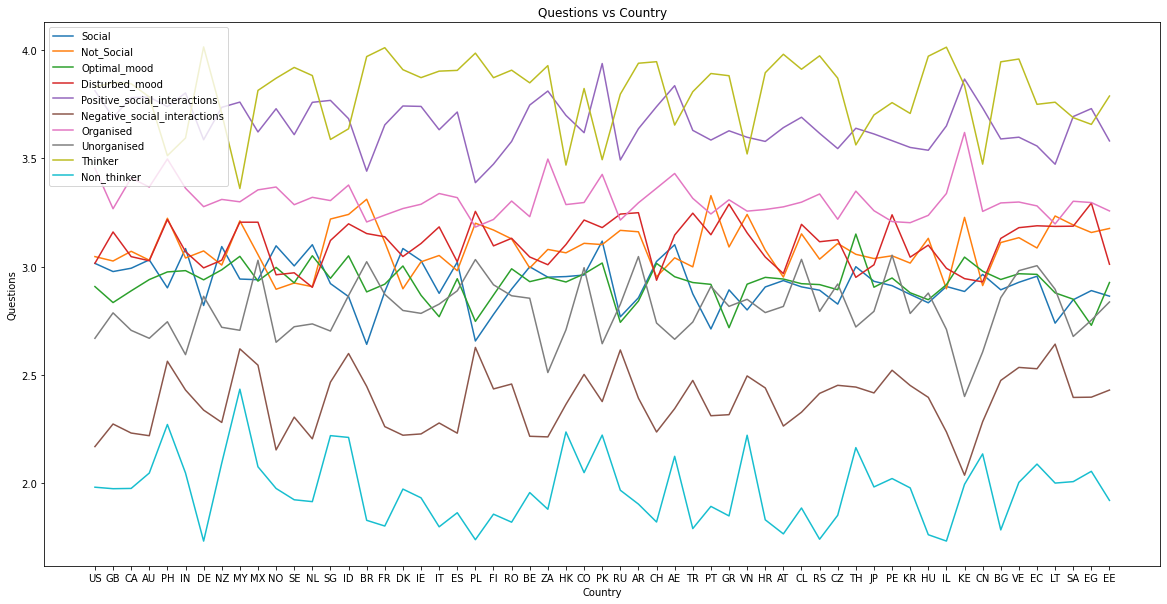

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Social, label='Social')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Not_Social, label='Not_Social')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Optimal_mood, label='Optimal_mood')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Disturbed_mood, label='Disturbed_mood')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Positive_social_interactions, label='Positive_social_interactions')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Negative_social_interactions, label='Negative_social_interactions')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Organised, label='Organised')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Unorganised, label='Unorganised')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Thinker, label='Thinker')
ax.plot(Big_Five_1_country.index, Big_Five_1_country.Non_thinker, label='Non_thinker')
ax.legend(loc = 'upper left')
plt.title('Questions vs Country')
plt.xlabel('Country')
plt.ylabel('Questions')
plt.show()

In [51]:
Big_Five_1.head()

,introelapse,testelapse,endelapse,IPC,country,Year,Month,Date,Hour,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
0,9.0,234.0,6,1,GB,2016,3,3,2,786432.0,4.6,5455.4,1.4,3858.2,3.0,5257.0,2.250,4648.125,3.833333,3764.333333,2.00,7458.25,3.333333,5439.500000,3.00,4323.00,4.285714,3310.428571,1.000000,4132.666667,1
1,12.0,179.0,11,1,MY,2016,3,3,2,1044480.0,2.4,4355.6,4.4,3149.8,2.0,2882.5,2.125,3589.250,4.333333,2907.500000,1.50,3054.25,3.666667,4796.000000,2.25,3463.25,3.142857,3036.714286,1.666667,3782.333333,1
2,3.0,186.0,7,1,GB,2016,3,3,2,1049088.0,2.4,6518.0,3.4,2951.4,3.0,4110.5,2.500,3471.875,3.833333,4478.500000,1.25,2526.00,3.166667,3214.666667,2.25,3853.00,3.857143,2607.857143,1.333333,3755.666667,1
3,186.0,219.0,7,1,GB,2016,3,3,2,2304000.0,2.2,4772.0,3.0,4217.6,2.5,3663.5,2.750,4143.875,3.833333,6056.333333,2.25,3919.50,2.333333,3782.666667,3.25,5120.25,3.714286,3353.428571,1.666667,4723.000000,1
4,8.0,315.0,17,2,KE,2016,3,3,2,1049088.0,3.4,7170.2,3.6,3426.0,4.0,2517.5,1.875,4104.500,4.333333,2607.833333,1.00,13910.00,4.666667,8952.000000,1.00,5101.00,4.714286,8576.571429,1.000000,5458.000000,1


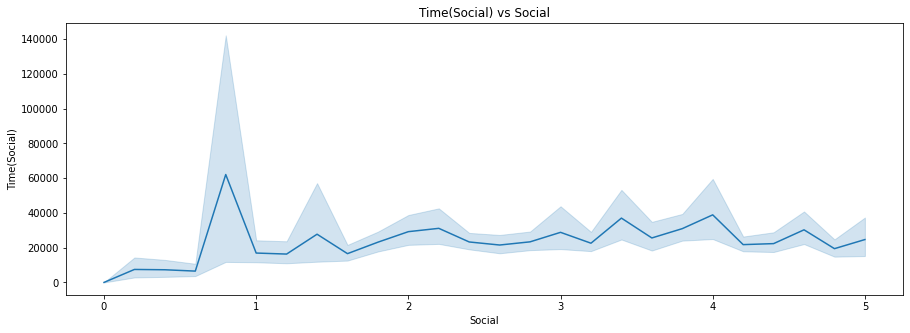

In [52]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Social,Big_Five_1.Social_E)
plt.title('Time(Social) vs Social')
plt.xlabel('Social')
plt.ylabel('Time(Social)')
plt.show()

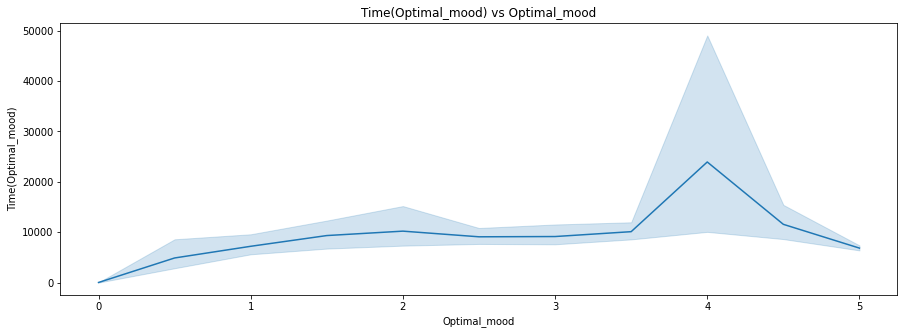

In [53]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Optimal_mood,Big_Five_1.Optimal_mood_E)
plt.title('Time(Optimal_mood) vs Optimal_mood')
plt.xlabel('Optimal_mood')
plt.ylabel('Time(Optimal_mood)')
plt.show()

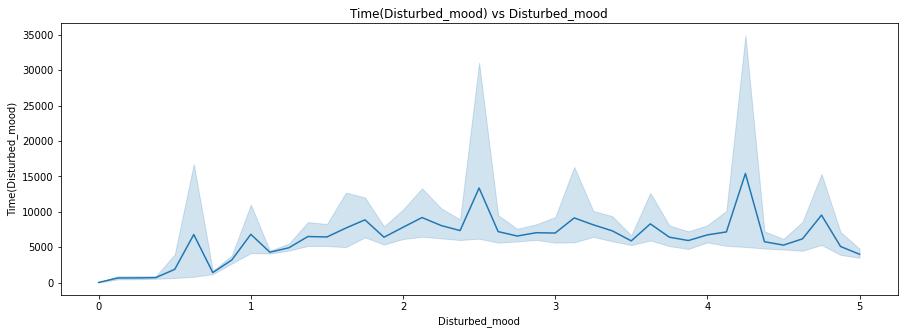

In [54]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Disturbed_mood,Big_Five_1.Disturbed_mood_E)
plt.title('Time(Disturbed_mood) vs Disturbed_mood')
plt.xlabel('Disturbed_mood')
plt.ylabel('Time(Disturbed_mood)')
plt.show()

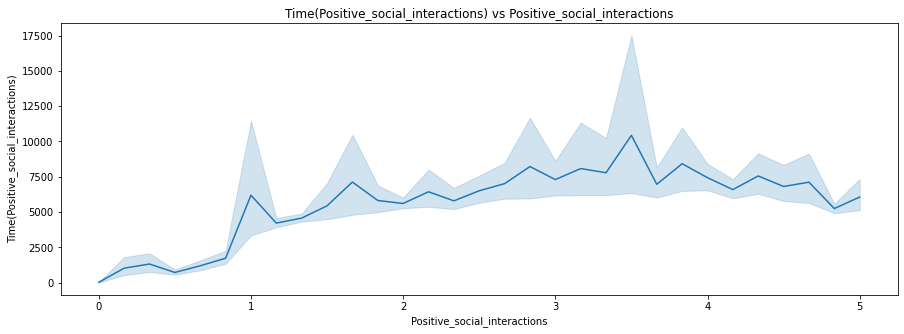

In [55]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Positive_social_interactions,Big_Five_1.Positive_social_interactions_E)
plt.title('Time(Positive_social_interactions) vs Positive_social_interactions')
plt.xlabel('Positive_social_interactions')
plt.ylabel('Time(Positive_social_interactions)')
plt.show()

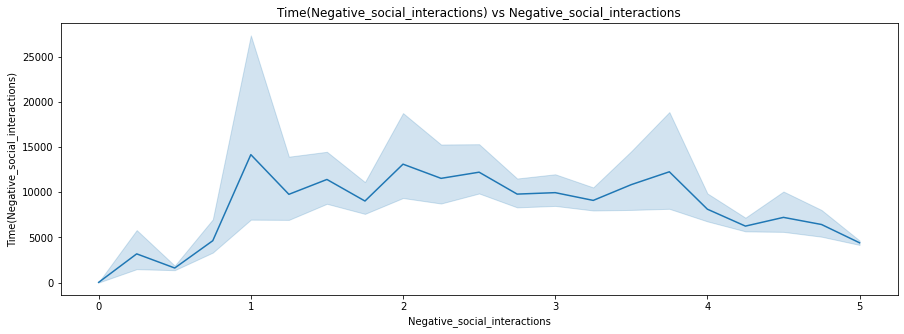

In [56]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Negative_social_interactions,Big_Five_1.Negative_social_interactions_E)
plt.title('Time(Negative_social_interactions) vs Negative_social_interactions')
plt.xlabel('Negative_social_interactions')
plt.ylabel('Time(Negative_social_interactions)')
plt.show()

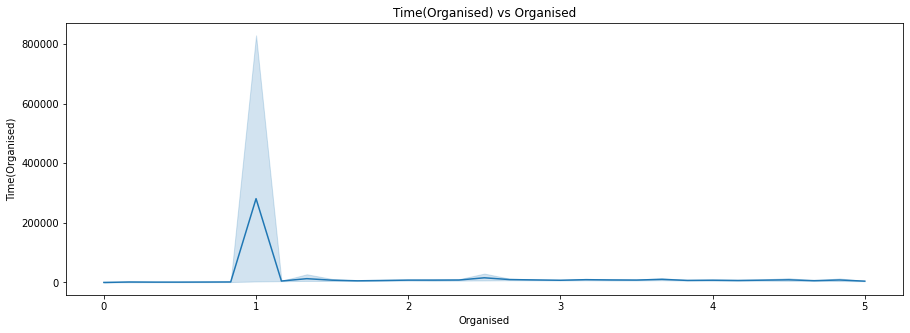

In [57]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Organised,Big_Five_1.Organised_E)
plt.title('Time(Organised) vs Organised')
plt.xlabel('Organised')
plt.ylabel('Time(Organised)')
plt.show()

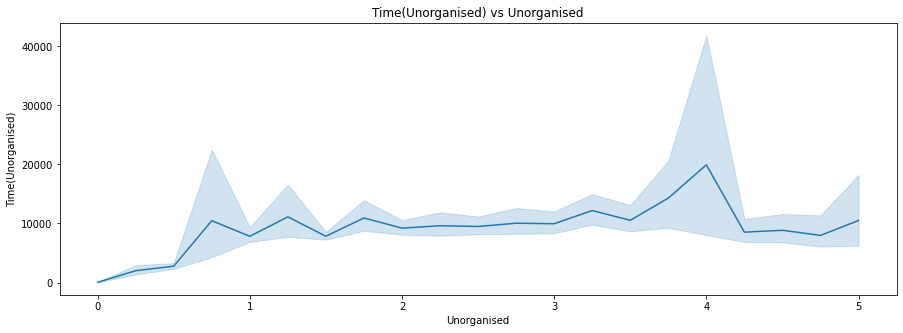

In [58]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Unorganised,Big_Five_1.Unorganised_E)
plt.title('Time(Unorganised) vs Unorganised')
plt.xlabel('Unorganised')
plt.ylabel('Time(Unorganised)')
plt.show()

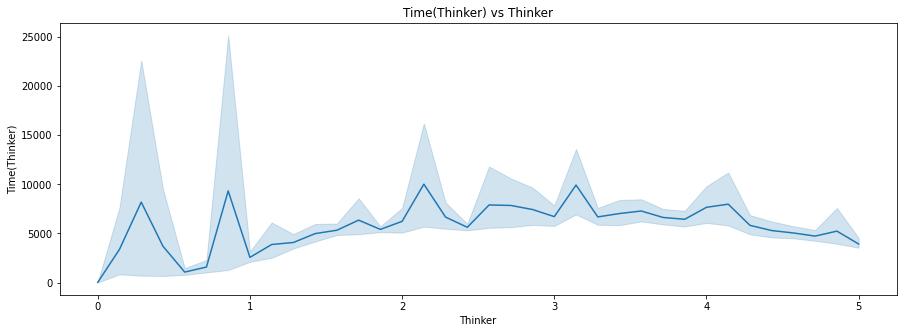

In [59]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Thinker,Big_Five_1.Thinker_E)
plt.title('Time(Thinker) vs Thinker')
plt.xlabel('Thinker')
plt.ylabel('Time(Thinker)')
plt.show()

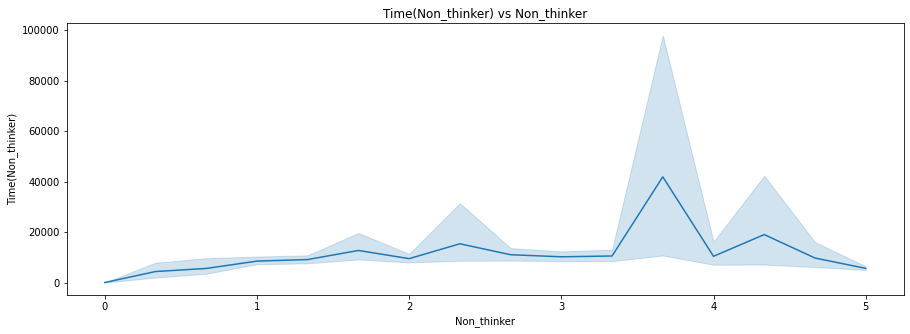

In [60]:
plt.figure(figsize=(15,5))
sns.lineplot(Big_Five_1.Non_thinker	,Big_Five_1.Non_thinker_E)
plt.title('Time(Non_thinker) vs Non_thinker')
plt.xlabel('Non_thinker')
plt.ylabel('Time(Non_thinker)')
plt.show()

In [61]:
Big_Five_1.head()

,introelapse,testelapse,endelapse,IPC,country,Year,Month,Date,Hour,screen_a,Social,Social_E,Not_Social,Not_Social_E,Optimal_mood,Optimal_mood_E,Disturbed_mood,Disturbed_mood_E,Positive_social_interactions,Positive_social_interactions_E,Negative_social_interactions,Negative_social_interactions_E,Organised,Organised_E,Unorganised,Unorganised_E,Thinker,Thinker_E,Non_thinker,Non_thinker_E,Count
0,9.0,234.0,6,1,GB,2016,3,3,2,786432.0,4.6,5455.4,1.4,3858.2,3.0,5257.0,2.250,4648.125,3.833333,3764.333333,2.00,7458.25,3.333333,5439.500000,3.00,4323.00,4.285714,3310.428571,1.000000,4132.666667,1
1,12.0,179.0,11,1,MY,2016,3,3,2,1044480.0,2.4,4355.6,4.4,3149.8,2.0,2882.5,2.125,3589.250,4.333333,2907.500000,1.50,3054.25,3.666667,4796.000000,2.25,3463.25,3.142857,3036.714286,1.666667,3782.333333,1
2,3.0,186.0,7,1,GB,2016,3,3,2,1049088.0,2.4,6518.0,3.4,2951.4,3.0,4110.5,2.500,3471.875,3.833333,4478.500000,1.25,2526.00,3.166667,3214.666667,2.25,3853.00,3.857143,2607.857143,1.333333,3755.666667,1
3,186.0,219.0,7,1,GB,2016,3,3,2,2304000.0,2.2,4772.0,3.0,4217.6,2.5,3663.5,2.750,4143.875,3.833333,6056.333333,2.25,3919.50,2.333333,3782.666667,3.25,5120.25,3.714286,3353.428571,1.666667,4723.000000,1
4,8.0,315.0,17,2,KE,2016,3,3,2,1049088.0,3.4,7170.2,3.6,3426.0,4.0,2517.5,1.875,4104.500,4.333333,2607.833333,1.00,13910.00,4.666667,8952.000000,1.00,5101.00,4.714286,8576.571429,1.000000,5458.000000,1


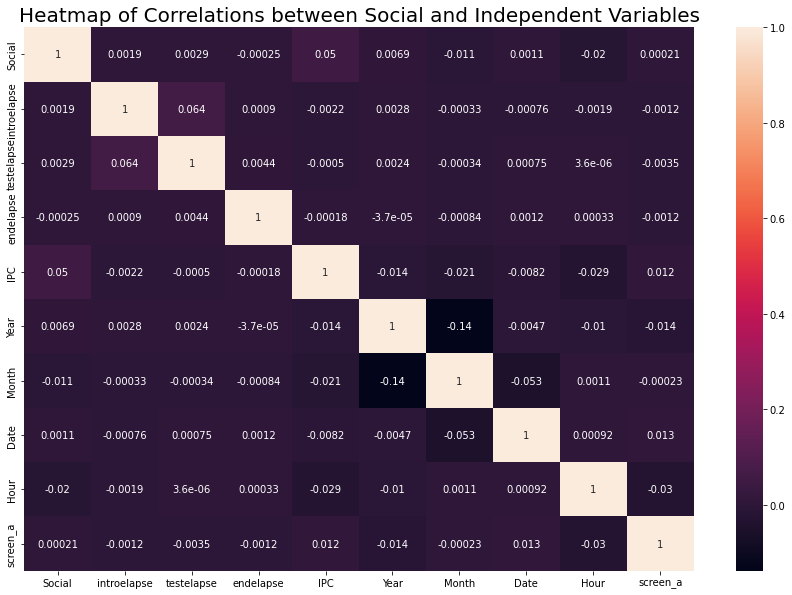

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(Big_Five_1[['Social','introelapse','testelapse','endelapse','IPC','Year','Month','Date','Hour','screen_a']].corr(),annot=True)
plt.title('Heatmap of Correlations between Social and Independent Variables',fontsize=20)
plt.show()

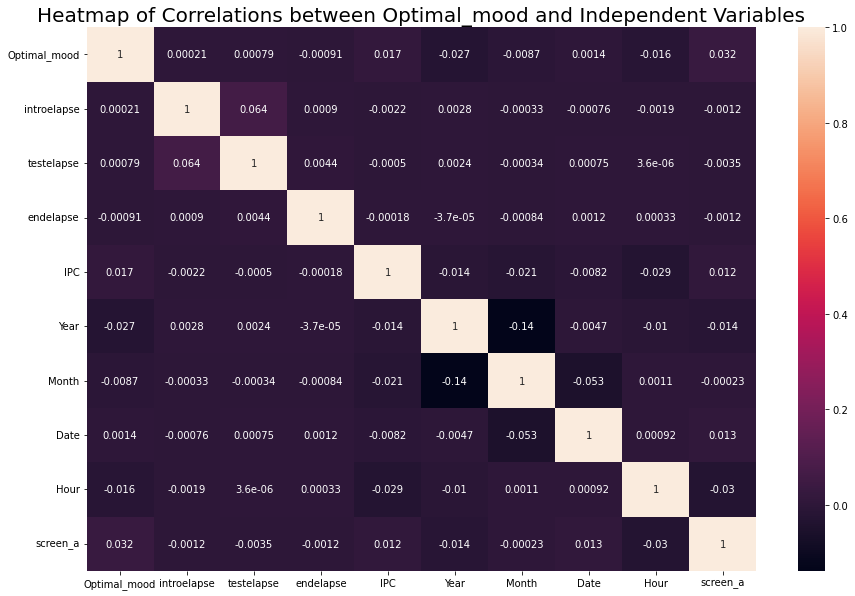

In [63]:
plt.figure(figsize=(15,10))
sns.heatmap(Big_Five_1[['Optimal_mood','introelapse','testelapse','endelapse','IPC','Year','Month','Date','Hour','screen_a']].corr(),annot=True)
plt.title('Heatmap of Correlations between Optimal_mood and Independent Variables',fontsize=20)
plt.show()

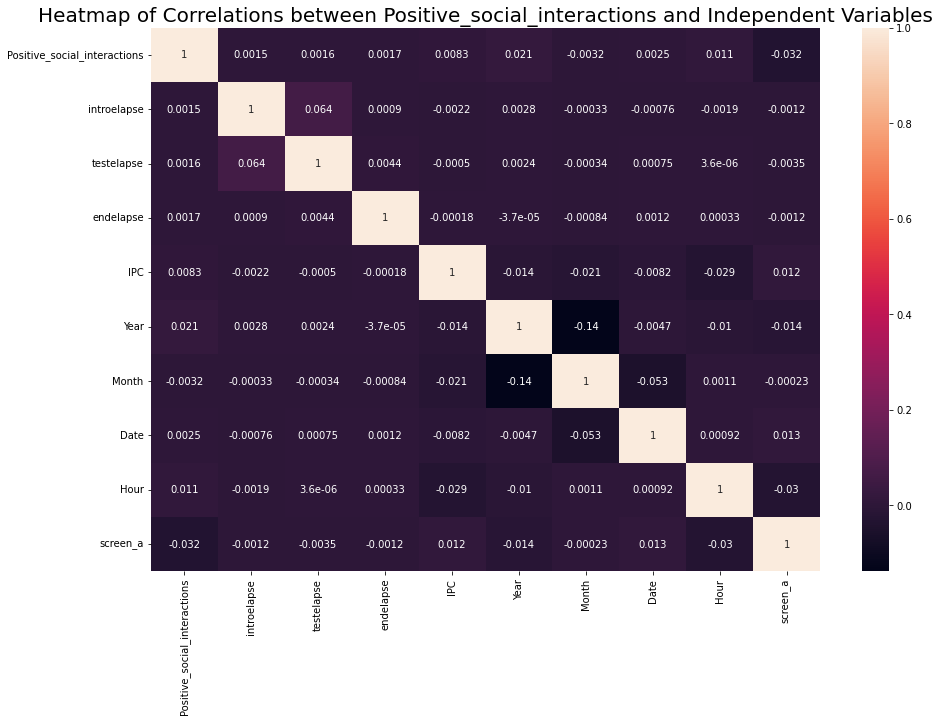

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(Big_Five_1[['Positive_social_interactions','introelapse','testelapse','endelapse','IPC','Year','Month','Date','Hour','screen_a']].corr(),annot=True)
plt.title('Heatmap of Correlations between Positive_social_interactions and Independent Variables',fontsize=20)
plt.show()

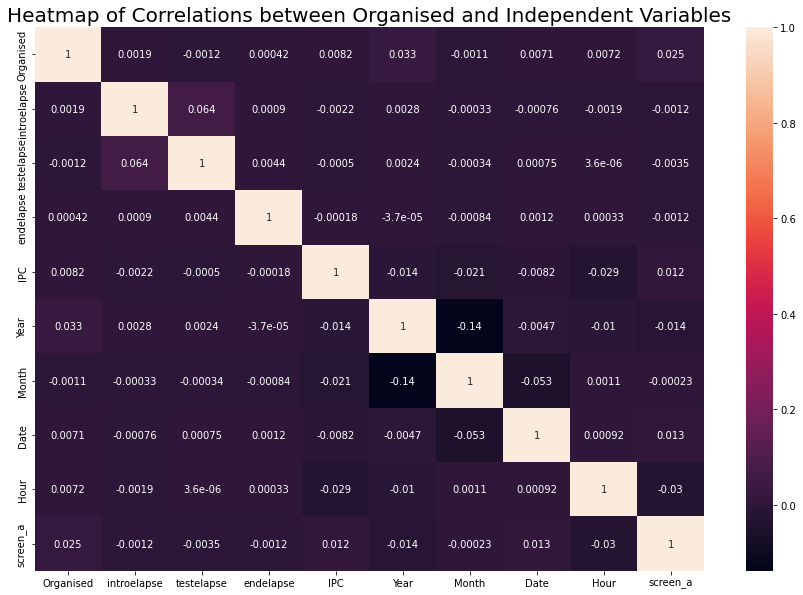

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(Big_Five_1[['Organised','introelapse','testelapse','endelapse','IPC','Year','Month','Date','Hour','screen_a']].corr(),annot=True)
plt.title('Heatmap of Correlations between Organised and Independent Variables',fontsize=20)
plt.show()

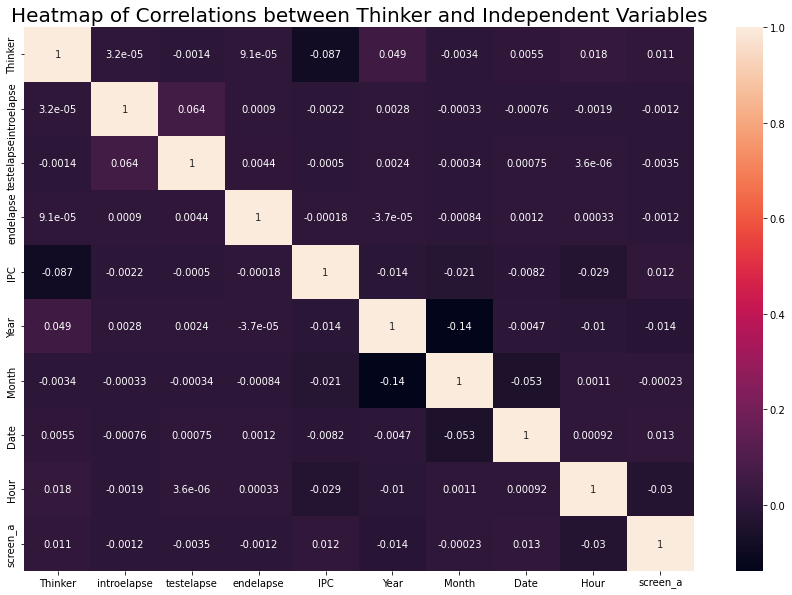

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(Big_Five_1[['Thinker','introelapse','testelapse','endelapse','IPC','Year','Month','Date','Hour','screen_a']].corr(),annot=True)
plt.title('Heatmap of Correlations between Thinker and Independent Variables',fontsize=20)
plt.show()

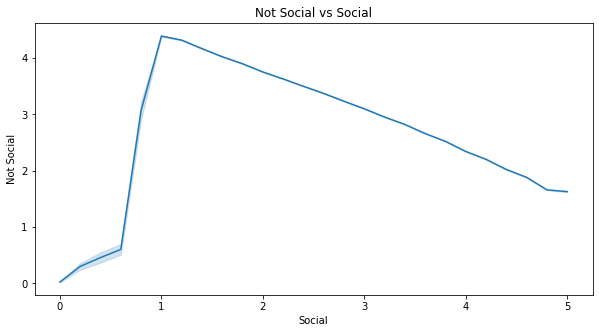

In [67]:
plt.figure(figsize=(10,5))
sns.lineplot(Big_Five_1.Social,Big_Five_1.Not_Social)
plt.title('Not Social vs Social')
plt.xlabel('Social')
plt.ylabel('Not Social')
plt.show()

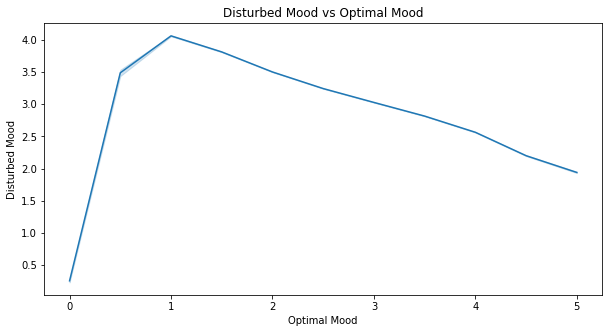

In [68]:
plt.figure(figsize=(10,5))
sns.lineplot(Big_Five_1.Optimal_mood,Big_Five_1.Disturbed_mood)
plt.title('Disturbed Mood vs Optimal Mood')
plt.xlabel('Optimal Mood')
plt.ylabel('Disturbed Mood')
plt.show()

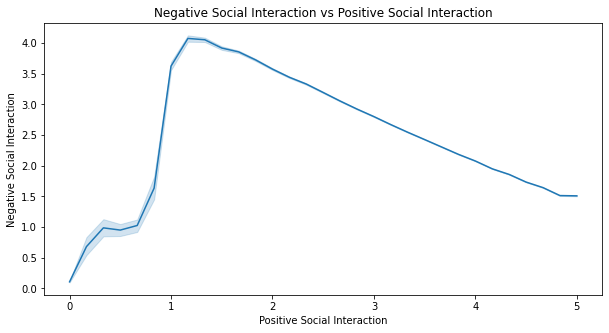

In [69]:
plt.figure(figsize=(10,5))
sns.lineplot(Big_Five_1.Positive_social_interactions,Big_Five_1.Negative_social_interactions)
plt.title('Negative Social Interaction vs Positive Social Interaction')
plt.xlabel('Positive Social Interaction')
plt.ylabel('Negative Social Interaction')
plt.show()

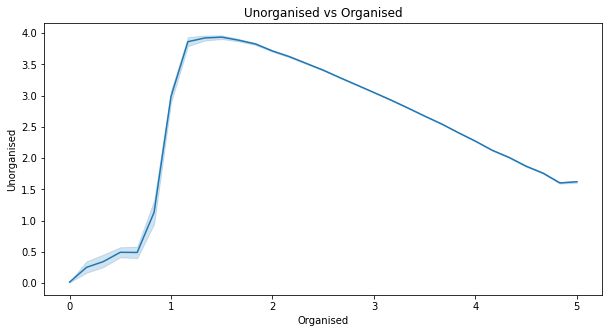

In [70]:
plt.figure(figsize=(10,5))
sns.lineplot(Big_Five_1.Organised,Big_Five_1.Unorganised)
plt.title('Unorganised vs Organised')
plt.xlabel('Organised')
plt.ylabel('Unorganised')
plt.show()

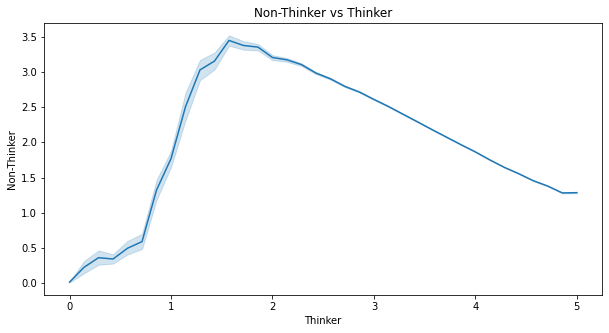

In [71]:
plt.figure(figsize=(10,5))
sns.lineplot(Big_Five_1.Thinker,Big_Five_1.Non_thinker)
plt.title('Non-Thinker vs Thinker')
plt.xlabel('Thinker')
plt.ylabel('Non-Thinker')
plt.show()

In [72]:
#Model Building

In [73]:
def ag(x):
    lis = list(x.columns)
    lis.remove('Count')
    lis.remove('country')
    dic = dict()
    for i in lis:
        dic[i] = 'mean'
    dic['Count'] = 'sum'
    return dic
    
Big_Five['Count'] = 1
Big_Five_country = Big_Five.groupby(['country']).agg(ag(Big_Five))

In [74]:
Big_Five_country.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,introelapse,testelapse,endelapse,IPC,Year,Month,Date,Hour,screen_a,Count
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AD,2.705882,2.823529,2.941176,3.176471,3.411765,2.529412,3.058824,3.176471,2.882353,3.588235,3.117647,3.176471,3.941176,3.176471,3.058824,2.529412,2.882353,2.588235,2.411765,2.235294,2.470588,3.882353,1.705882,3.941176,2.176471,3.705882,2.235294,3.588235,3.882353,3.882353,3.176471,3.000000,4.058824,2.882353,3.176471,2.764706,3.647059,2.294118,2.764706,3.588235,3.764706,2.176471,3.823529,2.058824,3.882353,1.647059,3.882353,3.000000,4.235294,4.000000,15327.294118,5915.764706,6363.647059,4507.117647,4768.176471,4633.411765,5964.117647,4987.411765,6731.117647,6885.235294,5770.000000,6835.882353,3747.235294,7619.941176,5780.941176,5160.588235,3907.941176,4757.235294,4391.352941,7085.411765,4671.764706,4457.470588,5282.647059,4570.941176,8677.588235,4564.176471,6049.058824,11995.764706,4529.764706,5675.294118,6700.529412,41472.705882,5096.176471,7253.764706,16250.411765,6083.882353,4375.764706,9706.235294,4160.235294,5897.647059,8431.235294,7493.823529,4717.764706,7214.235294,4460.588235,4750.705882,5238.000000,4715.058824,7023.294118,3668.235294,11016.647059,348.352941,17.647059,1.117647,2017.058824,7.764706,12.941176,10.823529,9.247631e+05,17
AE,2.840641,2.846859,3.320026,3.064791,3.306937,2.618783,2.852094,3.215969,3.185537,3.455825,3.207461,3.172120,3.768979,2.734293,3.072317,2.980366,3.221859,2.932264,3.102094,2.878599,2.700589,3.743455,2.060864,3.998691,2.312500,3.874673,2.303665,3.652160,3.971204,3.770288,3.321008,2.760798,3.996728,2.593259,2.910995,2.754254,3.597513,2.550065,3.174738,3.577552,3.438809,2.255890,3.928338,2.227421,3.771924,1.890052,3.957134,2.803338,3.805301,3.867147,852306.017016,6165.620092,29759.128599,7716.276832,8527.700916,6152.416230,9124.650851,7070.278469,8369.973495,5320.839660,6631.217605,7235.785668,4652.538285,11467.683901,6862.554647,5859.369437,5696.406414,5645.735929,5246.457461,5111.282068,11757.780105,5203.936846,6712.908377,8124.574280,7112.851113,4400.551047,9192.807919,7773.944372,4442.006217,9250.043848,9131.221204,9121.106021,6282.285668,7656.071008,8725.679319,7600.382853,5388.086387,11779.875327,5281.202225,8423.962369,7529.986257,9292.214987,8176.994437,9860.960079,4375.072971,8706.220550,7089.413285,5603.312173,6229.475458,12008.958442,1516.750982,2332.854712,2798.132526,6.505563,2017.077880,6.147579,15.453534,9.302029,9.805313e+05,3056
AF,3.018519,2.777778,3.388889,3.314815,3.666667,2.500000,2.981481,3.351852,3.222222,3.314815,2.870370,3.611111,3.592593,2.833333,2.740741,2.611111,2.907407,2.537037,2.907407,2.537037,2.796296,3.629630,2.129630,3.555556,2.333333,3.648148,2.462963,3.703704,3.759259,3.648148,3.333333,2.962963,3.833333,2.666667,3.000000,2.685185,3.648148,2.259259,3.462963,3.537037,3.500000,2.555556,3.944444,2.518519,3.685185,2.259259,3.962963,2.870370,3.962963,3.907407,26894.370370,5634.833333,6016.037037,4642.370370,4914.944444,3568.537037,5640.037037,5090.740741,12458.796296,7891.259259,7322.759259,5000.500000,10689.462963,8187.407407,4515.574074,4261.203704,5739.462963,4592.000000,4060.351852,4278.962963,8306.592593,7186.462963,7742.111111,5207.555556,6142.444444,3887.481481,4983.129630,5354.925926,4995.481481,5793.537037,7807.851852,15285.555556,5392.925926,6879.555556,5680.148148,6

In [75]:
Big_Five_country.Count.describe()

count       222.000000
mean       4497.004505
std       37200.775121
min           1.000000
25%          13.000000
50%         125.000000
75%        1029.750000
max      545414.000000
Name: Count, dtype: float64

In [76]:
#Clustering Countries

In [77]:
Big_Five_country = Big_Five_country.drop(['introelapse','testelapse','endelapse','IPC','Year','Month','Date','Hour','screen_a','Count'],axis=1)

In [78]:
Big_Five_country = Big_Five_country.drop([i for i in Big_Five_country.columns if i[-1] == 'E'],axis=1)

In [79]:
Big_Five_country.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AD,2.705882,2.823529,2.941176,3.176471,3.411765,2.529412,3.058824,3.176471,2.882353,3.588235,3.117647,3.176471,3.941176,3.176471,3.058824,2.529412,2.882353,2.588235,2.411765,2.235294,2.470588,3.882353,1.705882,3.941176,2.176471,3.705882,2.235294,3.588235,3.882353,3.882353,3.176471,3.000000,4.058824,2.882353,3.176471,2.764706,3.647059,2.294118,2.764706,3.588235,3.764706,2.176471,3.823529,2.058824,3.882353,1.647059,3.882353,3.000000,4.235294,4.000000
AE,2.840641,2.846859,3.320026,3.064791,3.306937,2.618783,2.852094,3.215969,3.185537,3.455825,3.207461,3.172120,3.768979,2.734293,3.072317,2.980366,3.221859,2.932264,3.102094,2.878599,2.700589,3.743455,2.060864,3.998691,2.312500,3.874673,2.303665,3.652160,3.971204,3.770288,3.321008,2.760798,3.996728,2.593259,2.910995,2.754254,3.597513,2.550065,3.174738,3.577552,3.438809,2.255890,3.928338,2.227421,3.771924,1.890052,3.957134,2.803338,3.805301,3.867147
AF,3.018519,2.777778,3.388889,3.314815,3.666667,2.500000,2.981481,3.351852,3.222222,3.314815,2.870370,3.611111,3.592593,2.833333,2.740741,2.611111,2.907407,2.537037,2.907407,2.537037,2.796296,3.629630,2.129630,3.555556,2.333333,3.648148,2.462963,3.703704,3.759259,3.648148,3.333333,2.962963,3.833333,2.666667,3.000000,2.685185,3.648148,2.259259,3.462963,3.537037,3.500000,2.555556,3.944444,2.518519,3.685185,2.259259,3.962963,2.870370,3.962963,3.907407
AG,2.333333,3.000000,3.000000,3.250000,3.500000,2.458333,2.333333,3.625000,2.166667,3.666667,2.958333,3.000000,3.958333,2.625000,2.708333,2.875000,3.166667,2.541667,3.041667,2.875000,2.458333,3.541667,2.375000,3.875000,2.166667,3.208333,2.708333,3.750000,3.375000,3.500000,3.291667,2.625000,3.750000,2.500000,2.541667,2.791667,3.875000,2.500000,3.041667,3.541667,3.750000,2.208333,4.333333,1.791667,3.833333,1.541667,3.916667,3.208333,4.333333,4.083333
AI,2.500000,3.000000,3.750000,3.500000,3.250000,2.500000,3.000000,4.000000,2.250000,4.000000,3.500000,3.750000,4.000000,2.500000,2.750000,2.750000,3.000000,2.500000,3.500000,2.500000,1.500000,4.000000,2.000000,4.250000,1.750000,4.250000,1.250000,4.250000,4.500000,3.750000,3.000000,2.500000,4.250000,2.000000,2.500000,2.000000,4.000000,2.750000,3.500000,4.250000,4.500000,2.000000,4.250000,1.750000,3.750000,1.250000,3.750000,4.250000,4.500000,4.500000


In [80]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [81]:
hopkins(Big_Five_country)

0.7270226208196658

In [82]:
#Scaling the data.

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
Big_Five_country_clust = Big_Five_country
scaler = StandardScaler()
Big_Five_country_clust_scaled = scaler.fit_transform(Big_Five_country_clust)
Big_Five_country_clust_scaled = pd.DataFrame(Big_Five_country_clust_scaled)
Big_Five_country_clust_scaled.columns = Big_Five_country_clust.columns
Big_Five_country_clust_scaled.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.447763,-0.247369,-0.637107,-0.122649,0.581035,0.054407,0.994172,-0.456078,-0.189036,0.041356,0.018180,-0.082049,0.438305,1.094817,0.221229,-0.697063,-0.358026,-0.385750,-1.230962,-1.483574,-0.087291,0.325370,-1.060958,0.292196,-0.411179,0.045158,-0.139013,0.060934,0.338892,0.790969,-0.176411,0.130477,0.382153,0.571967,0.975223,-0.159707,0.105625,-0.590954,-0.411649,0.083688,0.211850,0.275135,-0.375441,0.198767,0.203090,-0.619209,-0.512567,-0.215467,0.376403,0.169052
1,0.760803,-0.188530,0.322690,-0.392911,0.313747,0.271150,0.521467,-0.366044,0.451449,-0.296062,0.194062,-0.092656,0.059124,0.002622,0.249478,0.318879,0.373818,0.360261,0.218434,0.140428,0.408240,-0.027017,-0.297414,0.418162,-0.044803,0.494373,0.026336,0.250333,0.594530,0.476377,0.164387,-0.370230,0.197928,-0.020735,0.439724,-0.179106,-0.000216,-0.004996,0.479973,0.053678,-0.495371,0.490066,-0.128600,0.700409,-0.138292,0.087546,-0.275391,-0.611646,-0.635847,-0.184698
2,1.174004,-0.362762,0.497151,0.212140,1.230982,-0.016922,0.817322,-0.056304,0.528949,-0.655393,-0.466064,0.977677,-0.329282,0.247255,-0.444688,-0.513005,-0.304018,-0.496770,-0.190325,-0.721834,0.614439,-0.315796,-0.149503,-0.552372,0.011309,-0.108495,0.411585,0.403050,-0.015266,0.133503,0.193449,0.052949,-0.286828,0.129765,0.619259,-0.307298,0.107952,-0.670757,1.106723,-0.060137,-0.362581,1.301044,-0.090666,1.566532,-0.406438,1.161397,-0.256902,-0.476608,-0.264694,-0.077495
3,-0.417652,0.197715,-0.488080,0.055290,0.806017,-0.117972,-0.664727,0.566326,-1.700946,0.241221,-0.293805,-0.512314,0.476085,-0.267337,-0.512534,0.081502,0.254846,-0.486731,0.091562,0.131341,-0.113694,-0.538961,0.378274,0.147260,-0.437585,-1.279008,1.004991,0.540218,-1.120834,-0.282382,0.095205,-0.654490,-0.534061,-0.211936,-0.305259,-0.109668,0.592559,-0.119614,0.190607,-0.047132,0.179938,0.361365,0.825233,-0.596124,0.051550,-0.925745,-0.403737,0.204223,0.607198,0.390945
4,-0.030493,0.197715,1.412008,0.660282,0.168569,-0.016922,0.859667,1.421123,-1.524902,1.090645,0.766944,1.316312,0.567836,-0.576091,-0.425304,-0.200106,-0.104424,-0.577083,1.053866,-0.815333,-2.178401,0.623844,-0.428328,0.968567,-1.559819,1.493260,-2.521861,2.021642,2.115951,0.419424,-0.592504,-0.916145,0.949333,-1.237039,-0.389307,-1.579004,0.859587,0.452728,1.187261,1.942713,1.807494,-0.202443,0.628969,-0.720098,-0.206068,-1.774068,-0.932342,2.302673,0.999549,1.500407


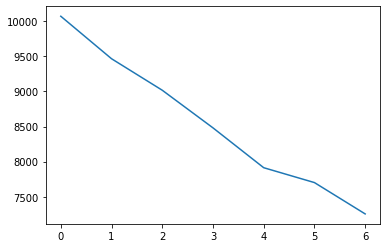

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Big_Five_country_clust_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [86]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Big_Five_country_clust_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Big_Five_country_clust_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2843773807211107
For n_clusters=3, the silhouette score is 0.19644739180975798
For n_clusters=4, the silhouette score is 0.1768725818276099
For n_clusters=5, the silhouette score is 0.1495324459544104
For n_clusters=6, the silhouette score is 0.06694592788194821
For n_clusters=7, the silhouette score is 0.10897562001866977
For n_clusters=8, the silhouette score is 0.10913815356260757


In [87]:
#Clustering the countries into 3 clusters.

In [88]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(Big_Five_country_clust_scaled)

KMeans(max_iter=100, n_clusters=3)

In [89]:
Big_Five_country['Cluster_ID'] = kmeans.labels_
Big_Five_country.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Cluster_ID
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AD,2.705882,2.823529,2.941176,3.176471,3.411765,2.529412,3.058824,3.176471,2.882353,3.588235,3.117647,3.176471,3.941176,3.176471,3.058824,2.529412,2.882353,2.588235,2.411765,2.235294,2.470588,3.882353,1.705882,3.941176,2.176471,3.705882,2.235294,3.588235,3.882353,3.882353,3.176471,3.000000,4.058824,2.882353,3.176471,2.764706,3.647059,2.294118,2.764706,3.588235,3.764706,2.176471,3.823529,2.058824,3.882353,1.647059,3.882353,3.000000,4.235294,4.000000,2
AE,2.840641,2.846859,3.320026,3.064791,3.306937,2.618783,2.852094,3.215969,3.185537,3.455825,3.207461,3.172120,3.768979,2.734293,3.072317,2.980366,3.221859,2.932264,3.102094,2.878599,2.700589,3.743455,2.060864,3.998691,2.312500,3.874673,2.303665,3.652160,3.971204,3.770288,3.321008,2.760798,3.996728,2.593259,2.910995,2.754254,3.597513,2.550065,3.174738,3.577552,3.438809,2.255890,3.928338,2.227421,3.771924,1.890052,3.957134,2.803338,3.805301,3.867147,2
AF,3.018519,2.777778,3.388889,3.314815,3.666667,2.500000,2.981481,3.351852,3.222222,3.314815,2.870370,3.611111,3.592593,2.833333,2.740741,2.611111,2.907407,2.537037,2.907407,2.537037,2.796296,3.629630,2.129630,3.555556,2.333333,3.648148,2.462963,3.703704,3.759259,3.648148,3.333333,2.962963,3.833333,2.666667,3.000000,2.685185,3.648148,2.259259,3.462963,3.537037,3.500000,2.555556,3.944444,2.518519,3.685185,2.259259,3.962963,2.870370,3.962963,3.907407,2
AG,2.333333,3.000000,3.000000,3.250000,3.500000,2.458333,2.333333,3.625000,2.166667,3.666667,2.958333,3.000000,3.958333,2.625000,2.708333,2.875000,3.166667,2.541667,3.041667,2.875000,2.458333,3.541667,2.375000,3.875000,2.166667,3.208333,2.708333,3.750000,3.375000,3.500000,3.291667,2.625000,3.750000,2.500000,2.541667,2.791667,3.875000,2.500000,3.041667,3.541667,3.750000,2.208333,4.333333,1.791667,3.833333,1.541667,3.916667,3.208333,4.333333,4.083333,2
AI,2.500000,3.000000,3.750000,3.500000,3.250000,2.500000,3.000000,4.000000,2.250000,4.000000,3.500000,3.750000,4.000000,2.500000,2.750000,2.750000,3.000000,2.500000,3.500000,2.500000,1.500000,4.000000,2.000000,4.250000,1.750000,4.250000,1.250000,4.250000,4.500000,3.750000,3.000000,2.500000,4.250000,2.000000,2.500000,2.000000,4.000000,2.750000,3.500000,4.250000,4.500000,2.000000,4.250000,1.750000,3.750000,1.250000,3.750000,4.250000,4.500000,4.500000,0


In [90]:
#Printing the Clusters

In [91]:
print('Cluster 1:',list(Big_Five_country[Big_Five_country.Cluster_ID==0].index))

Cluster 1: ['AI', 'BI', 'BJ', 'BS', 'CD', 'CM', 'CU', 'DM', 'ET', 'GA', 'GD', 'GH', 'GN', 'GQ', 'GY', 'KE', 'KM', 'LI', 'LR', 'MF', 'MH', 'ML', 'NG', 'NU', 'OM', 'PG', 'PW', 'RW', 'SL', 'SS', 'TC', 'TD', 'TJ', 'TL', 'TZ', 'UG', 'VC', 'VG', 'VU', 'ZW']


In [92]:
print('Cluster 2:',list(Big_Five_country[Big_Five_country.Cluster_ID==1].index))

Cluster 2: ['BQ', 'FK', 'PM']


In [93]:
print('Cluster 3:',list(Big_Five_country[Big_Five_country.Cluster_ID==2].index))

Cluster 3: ['AD', 'AE', 'AF', 'AG', 'AL', 'AM', 'AO', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AW', 'AX', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BM', 'BN', 'BO', 'BR', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CG', 'CH', 'CI', 'CK', 'CL', 'CN', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FM', 'FO', 'FR', 'GB', 'GE', 'GF', 'GG', 'GI', 'GL', 'GM', 'GP', 'GR', 'GT', 'GU', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IQ', 'IR', 'IS', 'IT', 'JE', 'JM', 'JO', 'JP', 'KG', 'KH', 'KN', 'KR', 'KW', 'KY', 'KZ', 'LA', 'LB', 'LC', 'LK', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MK', 'MM', 'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'MU', 'MV', 'MW', 'MX', 'MY', 'MZ', 'NC', 'NE', 'NI', 'NL', 'NO', 'NP', 'NZ', 'PA', 'PE', 'PF', 'PH', 'PK', 'PL', 'PR', 'PS', 'PT', 'PY', 'QA', 'RE', 'RO', 'RS', 'RU', 'SA', 'SC', 'SD', 'SE', 'SG', 'SH', 'SI', 'SK', 'SM', 'SN', 'SO', 'SR', 'SV', 'SX', 'SY', 'SZ', 'TG', 'TH', 'TN', 'TO', 'TR'

In [94]:
#Plotting the Clusters

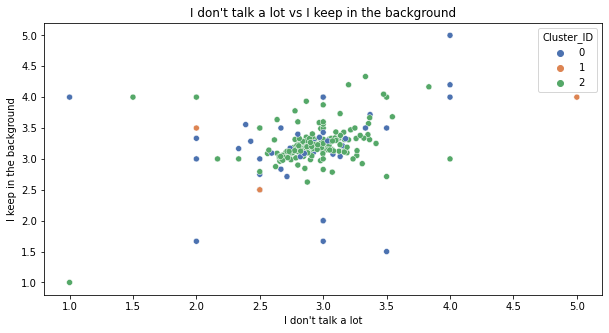

In [95]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'EXT2',y = 'EXT4', data = Big_Five_country, hue = 'Cluster_ID',palette='deep')
plt.title("I don't talk a lot vs I keep in the background")
plt.xlabel("I don't talk a lot")
plt.ylabel("I keep in the background")
plt.show()

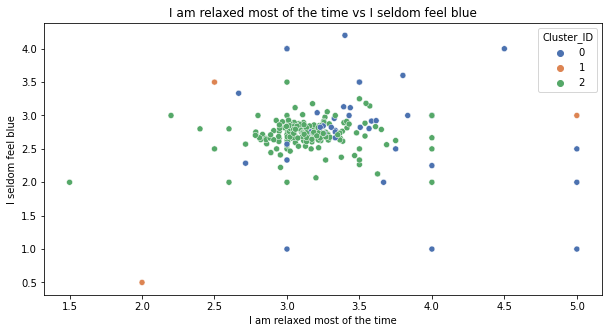

In [96]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'EST2',y = 'EST4', data = Big_Five_country, hue = 'Cluster_ID',palette='deep')
plt.title("I am relaxed most of the time vs I seldom feel blue")
plt.xlabel("I am relaxed most of the time")
plt.ylabel("I seldom feel blue")
plt.show()

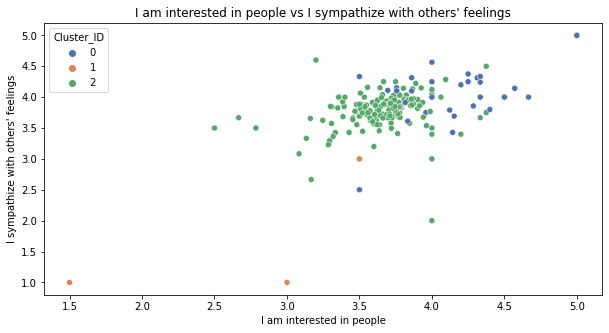

In [97]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'AGR2',y = 'AGR4', data = Big_Five_country, hue = 'Cluster_ID',palette='deep')
plt.title("I am interested in people vs I sympathize with others' feelings")
plt.xlabel("I am interested in people")
plt.ylabel("I sympathize with others' feelings")
plt.show()

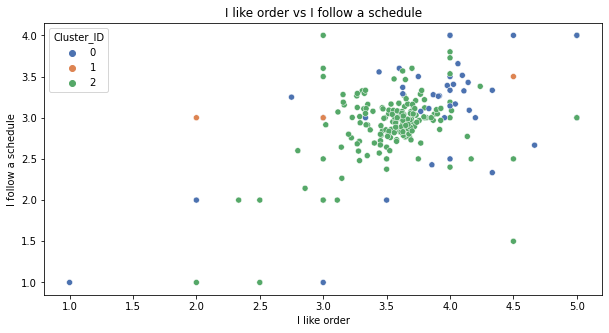

In [98]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'CSN7',y = 'CSN9', data = Big_Five_country, hue = 'Cluster_ID',palette='deep')
plt.title("I like order vs I follow a schedule")
plt.xlabel("I like order")
plt.ylabel("I follow a schedule")
plt.show()

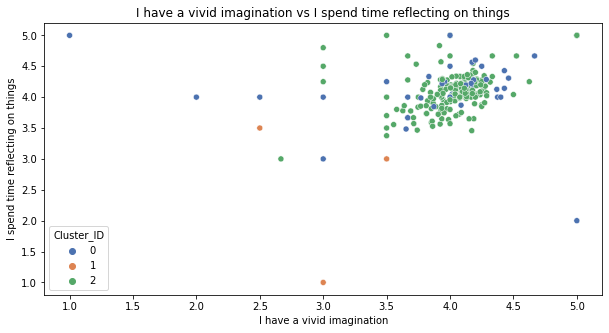

In [99]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'OPN3',y = 'OPN9', data = Big_Five_country, hue = 'Cluster_ID',palette='deep')
plt.title("I have a vivid imagination vs I spend time reflecting on things")
plt.xlabel("I have a vivid imagination")
plt.ylabel("I spend time reflecting on things")
plt.show()

In [100]:
#As we can see the clusters are not very well distinguished. Hence we will try clustering the data based on the engineered 
#variables. 

In [101]:
Big_Five_1_country = Big_Five_1_country[['Social','Not_Social','Optimal_mood','Disturbed_mood','Positive_social_interactions','Negative_social_interactions','Organised','Unorganised','Thinker','Non_thinker']]
Big_Five_1_country.head()

,Social,Not_Social,Optimal_mood,Disturbed_mood,Positive_social_interactions,Negative_social_interactions,Organised,Unorganised,Thinker,Non_thinker
country,,,,,,,,,,
US,3.014909,3.046163,2.907831,3.015210,3.811505,2.169281,3.454060,2.669048,3.828388,1.981879
GB,2.977138,3.025833,2.834036,3.159856,3.688003,2.273575,3.267189,2.786483,3.849431,1.974960
CA,2.992463,3.070587,2.888083,3.045965,3.779798,2.231826,3.409154,2.705843,3.843887,1.976238
AU,3.031076,3.029580,2.940095,3.027026,3.782649,2.219498,3.367151,2.669120,3.782904,2.047202
PH,2.901931,3.223066,2.975402,3.216984,3.738201,2.563158,3.496640,2.745426,3.512015,2.271317


In [102]:
#Scaling the data

In [103]:
scaler = StandardScaler()
col = Big_Five_1_country.columns
Big_Five_1_country_Clust = scaler.fit_transform(Big_Five_1_country)
Big_Five_1_country_Clust = pd.DataFrame(Big_Five_1_country_Clust,columns=col)
Big_Five_1_country_Clust.head()

,Social,Not_Social,Optimal_mood,Disturbed_mood,Positive_social_interactions,Negative_social_interactions,Organised,Unorganised,Thinker,Non_thinker
0,0.875779,-0.383040,-0.218871,-0.894703,1.396911,-1.532641,1.796882,-0.985135,0.166303,0.093896
1,0.520600,-0.578480,-1.125089,0.531177,0.260344,-0.766676,-0.497997,-0.122348,0.298243,0.049478
2,0.664710,-0.148241,-0.461381,-0.591534,1.105123,-1.073293,1.245413,-0.714808,0.263481,0.057684
3,1.027803,-0.542460,0.177345,-0.778224,1.131361,-1.163836,0.729586,-0.984609,-0.118882,0.513257
4,-0.186619,1.317605,0.610931,1.094333,0.722307,1.360118,2.319790,-0.423995,-1.817373,1.952015


In [104]:
hopkins(Big_Five_1_country_Clust)

0.702560032194792

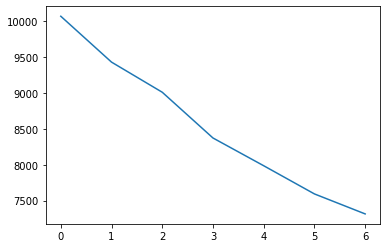

In [105]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Big_Five_country_clust_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [106]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Big_Five_1_country_Clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Big_Five_1_country_Clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.27226948907319165
For n_clusters=3, the silhouette score is 0.2796404951508445
For n_clusters=4, the silhouette score is 0.2346076448544675
For n_clusters=5, the silhouette score is 0.22103361644826344
For n_clusters=6, the silhouette score is 0.2274669013896064
For n_clusters=7, the silhouette score is 0.2235298839263354
For n_clusters=8, the silhouette score is 0.22398688866757732


In [107]:
#Clustering the countries into 3 clusters.

In [108]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(Big_Five_1_country_Clust)

KMeans(max_iter=100, n_clusters=3)

In [109]:
Big_Five_1_country['Cluster_ID'] = kmeans.labels_
Big_Five_1_country.head()

,Social,Not_Social,Optimal_mood,Disturbed_mood,Positive_social_interactions,Negative_social_interactions,Organised,Unorganised,Thinker,Non_thinker,Cluster_ID
country,,,,,,,,,,,
US,3.014909,3.046163,2.907831,3.015210,3.811505,2.169281,3.454060,2.669048,3.828388,1.981879,2
GB,2.977138,3.025833,2.834036,3.159856,3.688003,2.273575,3.267189,2.786483,3.849431,1.974960,0
CA,2.992463,3.070587,2.888083,3.045965,3.779798,2.231826,3.409154,2.705843,3.843887,1.976238,2
AU,3.031076,3.029580,2.940095,3.027026,3.782649,2.219498,3.367151,2.669120,3.782904,2.047202,2
PH,2.901931,3.223066,2.975402,3.216984,3.738201,2.563158,3.496640,2.745426,3.512015,2.271317,1


In [110]:
#Printing the Clusters

In [111]:
print('Cluster 1:',list(Big_Five_1_country[Big_Five_1_country.Cluster_ID==0].index))

Cluster 1: ['GB', 'DE', 'MX', 'BR', 'FR', 'IT', 'PL', 'FI', 'RO', 'CO', 'RU', 'AR', 'TR', 'PT', 'GR', 'VN', 'HR', 'CL', 'RS', 'CZ', 'JP', 'PE', 'KR', 'HU', 'BG', 'VE', 'EC', 'LT', 'SA', 'EG', 'EE']


In [112]:
print('Cluster 2:',list(Big_Five_1_country[Big_Five_1_country.Cluster_ID==1].index))

Cluster 2: ['PH', 'IN', 'MY', 'SG', 'ID', 'HK', 'PK', 'AE', 'TH']


In [113]:
print('Cluster 3:',list(Big_Five_1_country[Big_Five_1_country.Cluster_ID==2].index))

Cluster 3: ['US', 'CA', 'AU', 'NZ', 'NO', 'SE', 'NL', 'DK', 'IE', 'ES', 'BE', 'ZA', 'CH', 'AT', 'IL', 'KE', 'CN']


In [114]:
#Plotting the Clusters

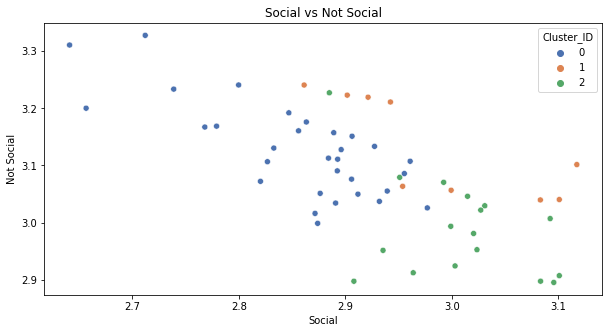

In [115]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Social',y = 'Not_Social', data = Big_Five_1_country, hue = 'Cluster_ID',palette='deep')
plt.title("Social vs Not Social")
plt.xlabel("Social")
plt.ylabel("Not Social")
plt.show()

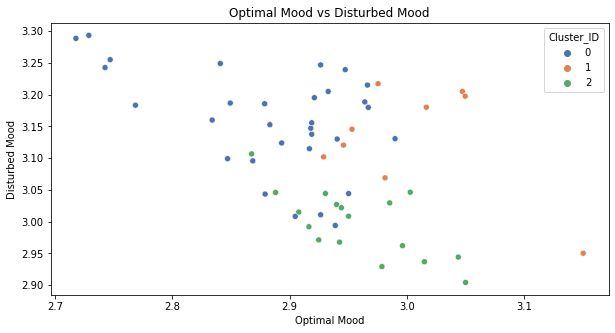

In [116]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Optimal_mood',y = 'Disturbed_mood', data = Big_Five_1_country, hue = 'Cluster_ID',palette='deep')
plt.title("Optimal Mood vs Disturbed Mood")
plt.xlabel("Optimal Mood")
plt.ylabel("Disturbed Mood")
plt.show()

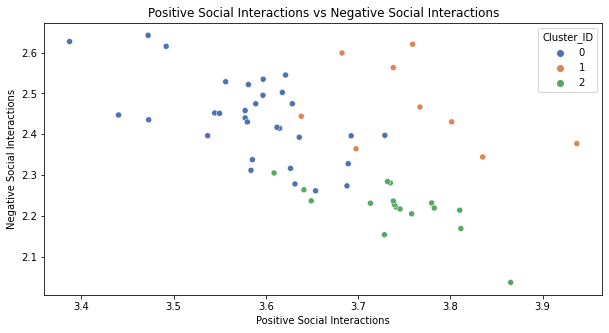

In [117]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Positive_social_interactions',y = 'Negative_social_interactions', data = Big_Five_1_country, hue = 'Cluster_ID',palette='deep')
plt.title("Positive Social Interactions vs Negative Social Interactions")
plt.xlabel("Positive Social Interactions")
plt.ylabel("Negative Social Interactions")
plt.show()

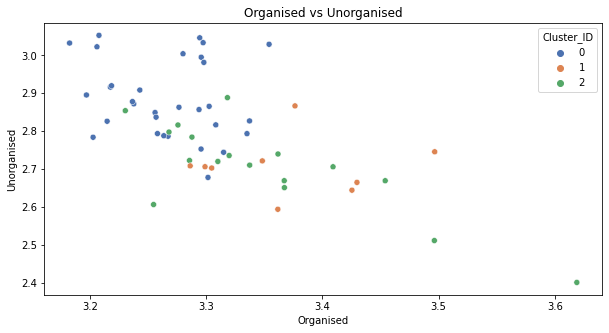

In [118]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Organised',y = 'Unorganised', data = Big_Five_1_country, hue = 'Cluster_ID',palette='deep')
plt.title("Organised vs Unorganised")
plt.xlabel("Organised")
plt.ylabel("Unorganised")
plt.show()

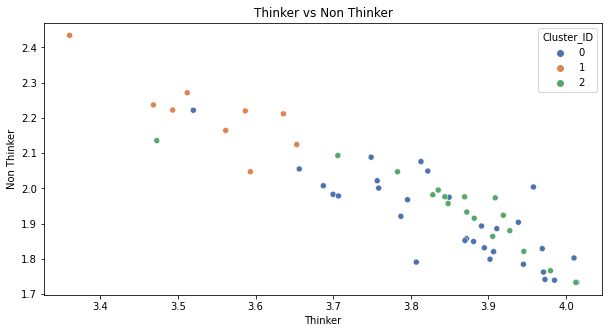

In [119]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Thinker',y = 'Non_thinker', data = Big_Five_1_country, hue = 'Cluster_ID',palette='deep')
plt.title("Thinker vs Non Thinker")
plt.xlabel("Thinker")
plt.ylabel("Non Thinker")
plt.show()

In [120]:
#As we can see we get slightly better distinguished clusters than from the original variables. 

In [121]:
# END FOR NOW #